## **Ted Talk Views Prediction**

TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over 4,000 TED talks including transcripts in many languages.

Founded in 1984 by Richard Salman as a nonprofit organization that aimed at bringing experts from the fields of Technology, Entertainment, and Design together.

TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan, and Bill Gates.

Our main objective is to build a predictive model to predict the number of views for the respective videos from the TEDx website.
As we have a continous variable to predict, we use regression models to predict the views of the TED talks.


##**<u>Steps to follow:</u>**
##**1)Data loading**
##**2)Data Cleaning**
##**3)EDA**
##**4)Feature engineering** 
##**5)Model buliding**
##**6)Evaluation of models**



In [1]:
  # Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**Loading the data**

In [4]:
#Importing the dataset

#tedtalk_df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/capstone 2/data_ted_talks.csv')

tedtalk_df = pd.read_csv('/content/drive/MyDrive/Copy of data_ted_talks.csv')

In [5]:
tedtalk_df.head(3)

talk_id  ...                                         transcript
0        1  ...  Thank you so much, Chris. And it's truly a gre...
1       92  ...  About 10 years ago, I took on the task to teac...
2        7  ...  (Music: "The Sound of Silence," Simon & Garfun...

[3 rows x 19 columns]

In [6]:
tedtalk_df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')

In [7]:
tedtalk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

In [8]:
tedtalk_df.shape

(4005, 19)

We can observe that we have 4005 rows of data a=with 19 variables. Before starting with the EDA, we need to clean the data.

##**Data Cleaning**

In [9]:
def missing_values_table(df):
        mis_val =df.isna().sum()
        mis_val_percent = 100 *df.isna().sum() / len(df)
        mz_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table.sort_values('% of Total Values', ascending=False).round(1)
        print (" selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]),"\n\n")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

missing_values_table(tedtalk_df)

 selected dataframe has 19 columns and 4005 




Missing Values  % of Total Values Data Type
comments                   655               16.4   float64
occupations                522               13.0    object
about_speakers             503               12.6    object
all_speakers                 4                0.1    object
recorded_date                1                0.0    object
talk_id                      0                0.0     int64
description                  0                0.0    object
url                          0                0.0    object
related_talks                0                0.0    object
topics                       0                0.0    object
duration                     0                0.0     int64
event                        0                0.0    object
available_lang               0                0.0    object
native_lang                  0                0.0    object
title                        0                0.0    object
published_date               0                0.0    object
views                        0                0.0     int64
speaker_1                    0                0.0    object
transcript                   0                0.0    object

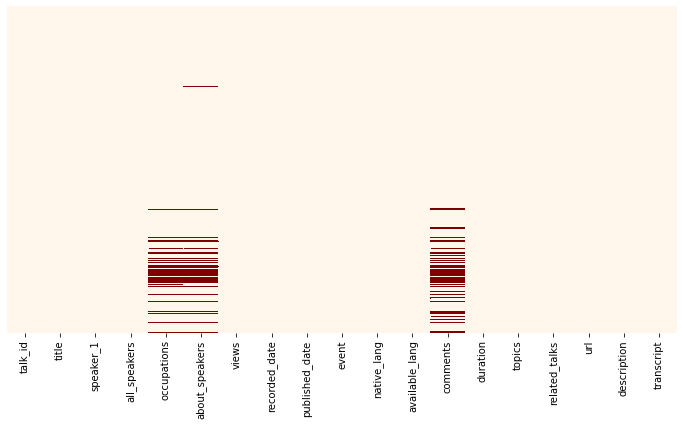

In [10]:
plt.figure(figsize=(12,6))
sns.heatmap(tedtalk_df.isnull(),cbar=False,yticklabels=False,cmap='OrRd');

We can see that we have missing values in several columns which needs to be treated after EDA.

Here many columns have the data in the form of a string and dictionaries. To access the data and to build model, we should have cleaned data which can be easily accessed. So we are converting all columns to its proper datatype.

In [11]:
tedtalk_df['occupations'].fillna(str({0:['other']}),inplace=True)
#filling NA with other

tedtalk_df['occupations'] = tedtalk_df.apply(lambda row: eval(row['occupations']), axis=1)
#to convert from str to dict

tedtalk_df['occupations'] = tedtalk_df['occupations'].apply(lambda x: x.get(0))
#to extract the dict values

tedtalk_df['about_speakers'].fillna(str({0:'Not specified'}),inplace=True)
#filling the NA's with 'Not specified'

tedtalk_df['about_speakers'] = tedtalk_df.apply(lambda row: eval(row['about_speakers']), axis=1)
#to convert from str to dict

tedtalk_df['about_speakers'] = tedtalk_df['about_speakers'].apply(lambda x: x.get(0))
#to extract the dict values

tedtalk_df['recorded_date'].fillna(tedtalk_df['recorded_date'].mode()[0],inplace=True)
#since dates are kind of discrete vaariables, we replace NA with mode.

tedtalk_df['available_lang'] = tedtalk_df['available_lang'].apply(lambda row: eval(row))
tedtalk_df['topics'] = tedtalk_df['topics'].apply(lambda row: eval(row))
tedtalk_df['related_talks'] = tedtalk_df['related_talks'].apply(lambda row: eval(row))
#converting all the remaining columns which were in strings to their respective datatypes.


Here, some of the missing values are treated which missing value % was very less. Its done beacuse it will give better visualizations in our EDA.

In [12]:
tedtalk_df.drop(['talk_id','all_speakers','url'],axis=1,inplace=True)

These columns are deleted as its not carrying much significance.

In [13]:
tedtalk_df.info()
#Apart from the numeric column we are going to deal with all other missing values as its usefull for the EDA.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           4005 non-null   object 
 1   speaker_1       4005 non-null   object 
 2   occupations     4005 non-null   object 
 3   about_speakers  4005 non-null   object 
 4   views           4005 non-null   int64  
 5   recorded_date   4005 non-null   object 
 6   published_date  4005 non-null   object 
 7   event           4005 non-null   object 
 8   native_lang     4005 non-null   object 
 9   available_lang  4005 non-null   object 
 10  comments        3350 non-null   float64
 11  duration        4005 non-null   int64  
 12  topics          4005 non-null   object 
 13  related_talks   4005 non-null   object 
 14  description     4005 non-null   object 
 15  transcript      4005 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory usage: 500.8+ KB


Date, month and year columns are converted to its proper Datetime datatype.

In [14]:
import datetime
tedtalk_df['published_date']=pd.to_datetime(tedtalk_df['published_date'], format='%Y-%m-%d')
tedtalk_df['recorded_date']=pd.to_datetime(tedtalk_df['recorded_date'], format='%Y-%m-%d')
#converting the published and recorded date as datetime datatype

In [15]:
tedtalk_df['release_day'] = tedtalk_df['published_date'].apply(lambda x: x.weekday())
tedtalk_df['release_month']=tedtalk_df['published_date'].apply(lambda x: x.month)
tedtalk_df['release_year'] = tedtalk_df['published_date'].apply(lambda x: x.year)
#finding out the respected day,month and year

In [16]:
week_day={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
tedtalk_df['release_day']=tedtalk_df['release_day'].map(week_day)
#tedtalk_day was interms of numbers which were holding the record of monday till sunday...so converting that to exact days here

month_dict={1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
tedtalk_df['release_month']=tedtalk_df['release_month'].map(month_dict)
#again converting the month which was in numbers to exact month names

In [17]:
tedtalk_df.head(2)

title     speaker_1  ... release_month release_year
0      Averting the climate crisis       Al Gore  ...          June         2006
1  The best stats you've ever seen  Hans Rosling  ...          June         2006

[2 rows x 19 columns]

In [18]:
ted_talk_df = tedtalk_df.copy()

In [19]:
tedtalk_df.head(2)

title     speaker_1  ... release_month release_year
0      Averting the climate crisis       Al Gore  ...          June         2006
1  The best stats you've ever seen  Hans Rosling  ...          June         2006

[2 rows x 19 columns]

Now that a basic level cleaning of dataset is done we will start with the process of EDA

#**EDA**

# **Speaker_1** **column**

##**Speakers with top 20 total views wrt their number of talks**

In [20]:
tedtalk_df['speaker_1'].nunique()

3274

In [21]:
speaker_with_most_talks = pd.DataFrame(tedtalk_df['speaker_1'].value_counts()).reset_index()
speaker_with_most_talks.rename(columns={'index':'speaker_1', 'speaker_1':'num_of_talks'}, inplace=True)


speaker_total_views_df=tedtalk_df.groupby('speaker_1').agg({'views' : 'sum'}).reset_index()
#speaker with respected total views
speaker_tv_df = speaker_total_views_df.head(20).sort_values('views',ascending=False)

speaker_report = speaker_with_most_talks.merge(speaker_total_views_df,on='speaker_1').reset_index()



In [24]:
#taking only numeric columns to do the minmaxscaling
speaker_numeric = speaker_report[['num_of_talks','views']]
#using standardization as both numeric columns are in different scale
#after words it will be easy for us to do the graphs
scaler = MinMaxScaler()
scaled = scaler.fit_transform(speaker_numeric)
#print(scaled)
speaker_report ['num_of_talks_scaler'] = pd.Series(scaled[i][0] for i in range(len(scaled)))
speaker_report ['views_scaler'] = pd.Series(scaled[i][1] for i in range(len(scaled)))
speaker_report = speaker_report.head(20)

Text(0.5, 1.0, 'Speaker with top 10 total views and number_of_talks')

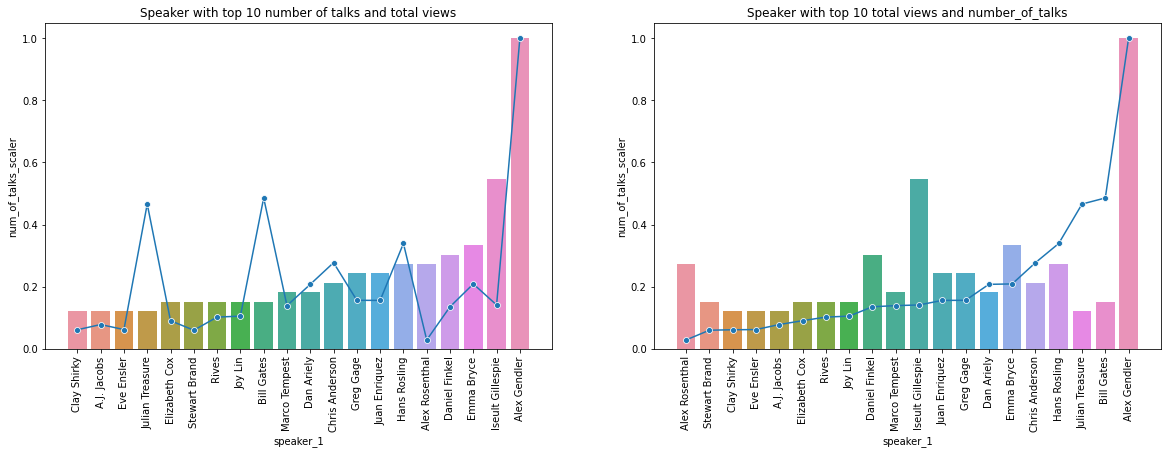

In [25]:
# graph for speakers which has maximum talks with respect to views

# # plotting the graph

speaker_report_1 = speaker_report.sort_values('num_of_talks_scaler')
speaker_report_2 = speaker_report.sort_values('views')
plt.figure(figsize=(20,6))

plt.subplot(1, 2, 1)
#plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.barplot(x='speaker_1',y='num_of_talks_scaler',data = speaker_report_1)
sns.lineplot(x='speaker_1',y='views_scaler',data=speaker_report_1,marker='o')
plt.title('Speaker with top 10 number of talks and total views')

plt.subplot(1, 2, 2)
plt.xticks(rotation=90)
sns.barplot(x='speaker_1',y='num_of_talks_scaler',data = speaker_report_2)
sns.lineplot(x='speaker_1',y='views_scaler',data=speaker_report_2,marker='o')
plt.title('Speaker with top 10 total views and number_of_talks')
#speaker_report


We have the visualization for the same data from two different aspect here.


(1) First is the graph which contains Speakers who had given most number of talks. And the line graph represents their Views. 
We can observe that Bill Gates was the influenced person, so even if his number of talks are less, he has received more number of views. So the speaker influences the number of views fo the talks.We ca see some hike in the graoh for the influenced speakers.

(2) Second is the graph which is sorted according to the Number of views talks received. We can observe that the number of talks is not directly contributing to the number of views talks can receive. 




## **Speaker who received more number of views for one video.**

In [26]:
most_popular_video_df = tedtalk_df.nlargest(10,['views'])
most_popular_video_df[['speaker_1','views','title']]

speaker_1  ...                                              title
4     Sir Ken Robinson  ...                        Do schools kill creativity?
1296         Amy Cuddy  ...           Your body language may shape who you are
2062      James Veitch  ...  This is what happens when you reply to spam email
646        Simon Sinek  ...                   How great leaders inspire action
796        Brené Brown  ...                         The power of vulnerability
1724   Julian Treasure  ...         How to speak so that people want to listen
2108         Tim Urban  ...         Inside the mind of a master procrastinator
1366   Cameron Russell  ...  Looks aren't everything. Believe me, I'm a model.
2724         Sam Berns  ...                     My philosophy for a happy life
1898        Bill Gates  ...                 The next outbreak? We're not ready

[10 rows x 3 columns]

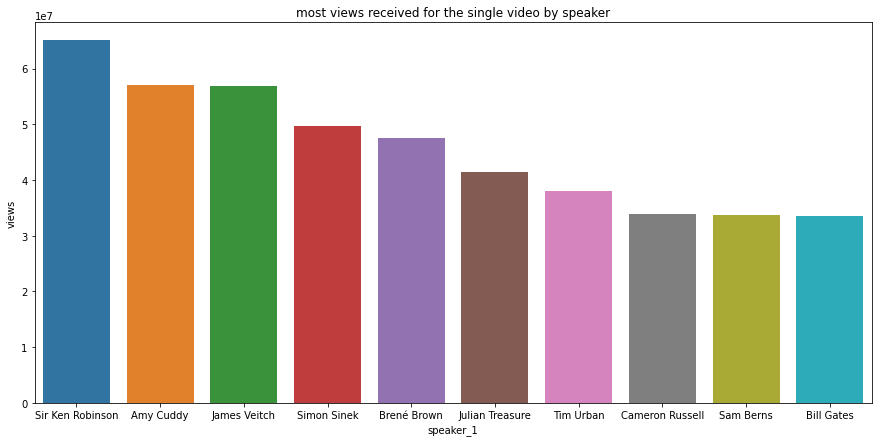

In [27]:
plt.figure(figsize=(15,7))
plt.title("most views received for the single video by speaker")
sns.barplot(x='speaker_1',y='views',data=most_popular_video_df)

This graph represents the maximum views a single video received. Sir Ken Robinson is the one who received maximum number of views for a single video.

#**Occupations column**

## **Top occupations of the speaker**

In [28]:

tedtalk_df['speaker_occupation']=pd.Series()
for i in range(len(tedtalk_df)):
  tedtalk_df.loc[i,'speaker_occupation'] = tedtalk_df['occupations'][i][0]

In [29]:
tedtalk_df['speaker_occupation']

0                           climate advocate
1       global health expert; data visionary
2                       technology columnist
3         activist for environmental justice
4                                     author
                        ...                 
4000                         health activist
4001                                   other
4002                          law researcher
4003                                   other
4004                                   other
Name: speaker_occupation, Length: 4005, dtype: object

In [30]:
tedtalk_df.drop('occupations',axis=1,inplace=True)

In [31]:
tedtalk_df['speaker_occupation'].nunique()

1552

We can observe that there are 1552 different occupations for the respective speakers in TED talk videos

In [32]:
speaker_occupations_df = pd.DataFrame(tedtalk_df['speaker_occupation'].value_counts()).reset_index()
speaker_occupations_df.rename(columns={'index':'Occupations', 'speaker_occupation':'Number_of_speakers'}, inplace=True)

occupations_with_most_views = tedtalk_df.groupby(['speaker_occupation'],dropna=True)['views'].mean().reset_index()
occupations_with_most_views.rename(columns={'speaker_occupation':'Occupations', 'views':'views'}, inplace=True)

occupation_report = speaker_occupations_df.merge(occupations_with_most_views,on='Occupations')


In [34]:
#taking only numeric columns to do the minmaxscaling
occupation_numeric = occupation_report[['Number_of_speakers','views']]
#using standardization as both numeric columns are in different scale
#after words it will be easy for us to do the graphs
scaler = MinMaxScaler()
scaled = scaler.fit_transform(occupation_numeric)
#print(scaled)
occupation_report ['Number_of_speakers_scaler'] = pd.Series(scaled[i][0] for i in range(len(scaled)))
occupation_report ['views_scaler'] = pd.Series(scaled[i][1] for i in range(len(scaled)))
occupation_report = occupation_report.loc[1:21,:]

Text(0.5, 1.0, 'Occupations with average views and respected number of speakers')

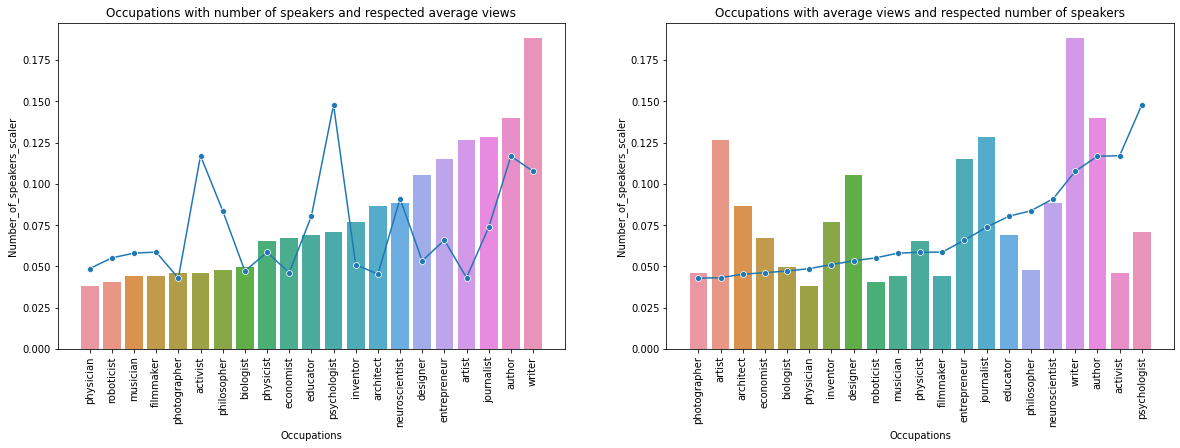

In [35]:
# graph for occupation which has maximum talks with respect to views

# # plotting the graph

occupation_report_1 = occupation_report.sort_values('Number_of_speakers')
occupation_report_2 = occupation_report.sort_values('views')

plt.figure(figsize=(20,6))

plt.subplot(1, 2, 1)
#plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.barplot(x='Occupations',y='Number_of_speakers_scaler',data = occupation_report_1)
sns.lineplot(x='Occupations',y='views_scaler',data = occupation_report_1,marker='o')
plt.title('Occupations with number of speakers and respected average views')



plt.subplot(1, 2, 2)
#plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.barplot(x='Occupations',y='Number_of_speakers_scaler',data = occupation_report_2)
sns.lineplot(x='Occupations',y='views_scaler',data = occupation_report_2,marker='o')
plt.title('Occupations with average views and respected number of speakers')


Again we have 2 representation of the same graphs, once sorted according to the number of talks then according to the number of views.

(1) In first graph, we can see that, again number of talks for the respective occupations are not directly contributing to the number of views. Instead the type of occupations are bringinfg a hike in number of views. For example, psychology (which everybody loves to listen about) and Activist (Who will make everybody listen to them by theri words). The occupations (might be their skills to talk to) does matter in number of views.

(2) Second graph contains the grapph which is sorted according to the number of views. We can See that the top 3 views were received by Psychologist, Activist and Author who all are very good in making people love what they speak.

##**Occupations which received maximum number of views for a a single video.**

In [36]:

most_popular_video_df = tedtalk_df.nlargest(10,['views'])
most_popular_video_df[['speaker_occupation','views','title']]

speaker_occupation  ...                                              title
4                       author  ...                        Do schools kill creativity?
1296       social psychologist  ...           Your body language may shape who you are
2062       comedian and writer  ...  This is what happens when you reply to spam email
646          leadership expert  ...                   How great leaders inspire action
796   vulnerability researcher  ...                         The power of vulnerability
1724          sound consultant  ...         How to speak so that people want to listen
2108                   blogger  ...         Inside the mind of a master procrastinator
1366                     model  ...  Looks aren't everything. Believe me, I'm a model.
2724                  activist  ...                     My philosophy for a happy life
1898            philanthropist  ...                 The next outbreak? We're not ready

[10 rows x 3 columns]

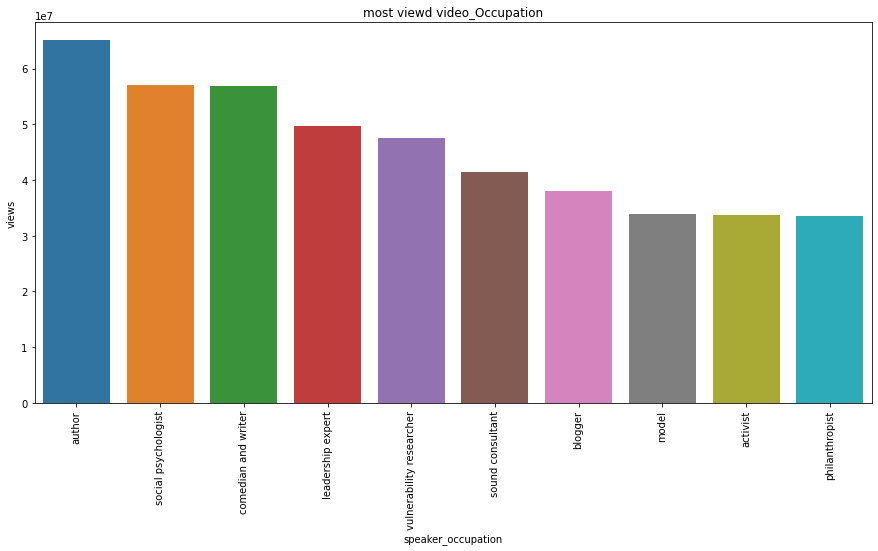

In [252]:
plt.figure(figsize=(15,7))
plt.title("most viewd video_Occupation")
plt.xticks(rotation=90)
sns.barplot(x='speaker_occupation',y='views',data=most_popular_video_df)

We can observe that the maximum number of views for a single video was received by the occuapttions Author followed by Psychologist.

#**Published date and released date**

##**Finding out on which day most of the videos were released**

In [38]:
#creating a df which holds the number of talks on each day
talk_rel_day_df = pd.DataFrame(tedtalk_df['release_day'].value_counts()).reset_index()
talk_rel_day_df.rename(columns={'index':'release_day', 'release_day':'num_of_talks'}, inplace=True)

#creating another df which holds the record of views on each day
popular_day = tedtalk_df[['release_day','views']].groupby('release_day').agg({'views' : 'mean'}).sort_values('views',ascending=False).reset_index()

#merging both df
talk_day_report = talk_rel_day_df.merge(popular_day,on='release_day')

talk_day_report

release_day  num_of_talks         views
0     Tuesday           857  2.025352e+06
1    Thursday           832  1.907994e+06
2      Friday           789  2.693812e+06
3      Monday           727  1.953866e+06
4   Wednesday           703  2.293402e+06
5      Sunday            55  1.458068e+06
6    Saturday            42  9.821678e+05

In [39]:
#Sorting the days by using another dataframe with the day values

day_value = pd.DataFrame([['Sunday',0],['Monday',1],['Tuesday',2],['Wednesday',3],['Thursday',4],['Friday',5],['Saturday',6]])
day_value.rename(columns={0:'release_day',1:'Day_value'},inplace=True)
day_value
talk_day_report = talk_day_report.merge(day_value,on='release_day')

talk_day_report

release_day  num_of_talks         views  Day_value
0     Tuesday           857  2.025352e+06          2
1    Thursday           832  1.907994e+06          4
2      Friday           789  2.693812e+06          5
3      Monday           727  1.953866e+06          1
4   Wednesday           703  2.293402e+06          3
5      Sunday            55  1.458068e+06          0
6    Saturday            42  9.821678e+05          6

In [40]:
talk_day_report = talk_day_report.sort_values('Day_value',ascending=True)
talk_day_report = talk_day_report.drop('Day_value',axis=True)
talk_day_report

release_day  num_of_talks         views
5      Sunday            55  1.458068e+06
3      Monday           727  1.953866e+06
0     Tuesday           857  2.025352e+06
4   Wednesday           703  2.293402e+06
1    Thursday           832  1.907994e+06
2      Friday           789  2.693812e+06
6    Saturday            42  9.821678e+05

In [41]:
#taking only numeric columns to do the minmaxscaling
talk_day_numeric = talk_day_report[['num_of_talks','views']]
print(talk_day_numeric)
#using standardization as both numeric columns are in different scale
#after words it will be easy for us to do the graphs
scaler = MinMaxScaler()
scaled = scaler.fit_transform(talk_day_numeric)
#print(scaled)
talk_day_report ['num_of_talks_scaler'] = pd.Series(scaled[i][0] for i in range(len(scaled)))
talk_day_report ['views_scaler'] = pd.Series(scaled[i][1] for i in range(len(scaled)))

   num_of_talks         views
5            55  1.458068e+06
3           727  1.953866e+06
0           857  2.025352e+06
4           703  2.293402e+06
1           832  1.907994e+06
2           789  2.693812e+06
6            42  9.821678e+05


In [42]:
talk_day_report

release_day  num_of_talks         views  num_of_talks_scaler  views_scaler
5      Sunday            55  1.458068e+06             0.916564      1.000000
3      Monday           727  1.953866e+06             0.811043      0.766067
0     Tuesday           857  2.025352e+06             0.015951      0.278037
4   Wednesday           703  2.293402e+06             0.969325      0.540899
1    Thursday           832  1.907994e+06             0.840491      0.567699
2      Friday           789  2.693812e+06             1.000000      0.609463
6    Saturday            42  9.821678e+05             0.000000      0.000000

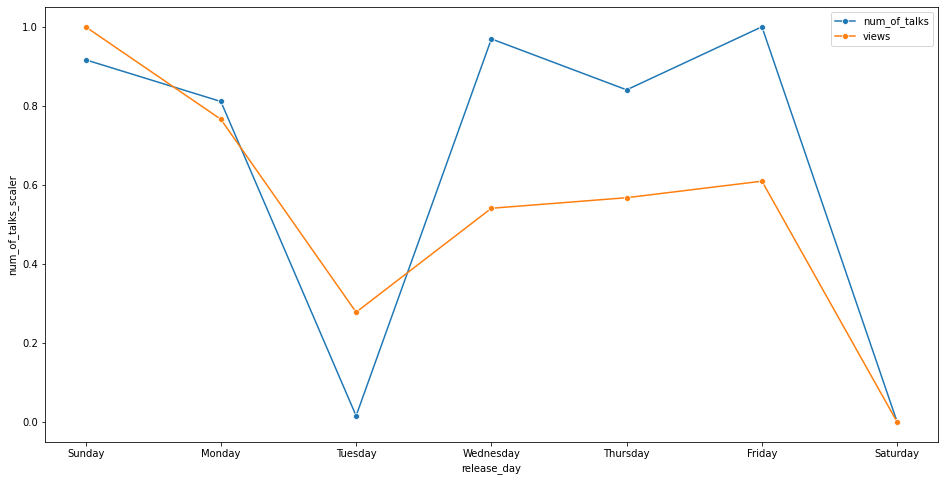

In [43]:
plt.figure(figsize=(16,8))
for i in talk_day_report.iloc[:,3:]:
  sns.lineplot(data=talk_day_report,x='release_day',y=i,marker='o')

plt.legend(labels=talk_day_numeric)

We can observe in this graph about the comparision of number of talks and as well as the number of views a particular day received. We can see that on saturday the number of talks and as well as the number of views were low. And on Sunday, Wednesday and Friday the release were high. But the number of views were high only on Sunday.

It may seem that only on weekends people were interested to give a time for TED talk videos.

## **Month**

In [48]:
! pip install sorted-months-weekdays
! pip install sort-dataframeby-monthorweek

from sorted_months_weekdays import *
from sort_dataframeby_monthorweek import *

  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3247 sha256=f84c76f9746b1415f0407cd8b0a779d0c4dad63a20ecd9eae88784ffed894392
  Stored in directory: /root/.cache/pip/wheels/4f/4f/78/3f1b8fc72651f7c766a6f73d667fccb12a8aabe240b38df7a4
Successfully built sorted-months-weekdays
  Created wheel for sort-dataframeby-monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3442 sha256=38b74c774bf4fd122ef8671514016c44b5b3d4b1ff7bd3e1f4964ca9af8132cd
  Stored in directory: /root/.cache/pip/wheels/de/e1/ad/5fe265a9780676079c4b8caaaffaa8d5c4ab2f37cf823e8aa8
Successfully built sort-dataframeby-monthorweek


In [49]:
# creating data frame for num of talks in a particular month 
talk_rel_month_df = pd.DataFrame(tedtalk_df['release_month'].value_counts()).reset_index()
talk_rel_month_df.rename(columns={'index':'release_month', 'release_month':'num_of_talks'}, inplace=True)

#Printing the most popular release month according to average Views
popular_month = tedtalk_df[['release_month','views']].groupby('release_month').agg({'views' : 'mean'}).sort_values('release_month').reset_index()

#merging two dataframes which has number of talks and views received in the same df
talk_month_report = talk_rel_month_df.merge(popular_month,on='release_month')

#sorting according to month in here
talk_month_report = Sort_Dataframeby_Month(df=talk_month_report ,monthcolumnname='release_month')



In [50]:
#taking only numeric columns to do the minmaxscaling
talk_month_numeric = talk_month_report[['num_of_talks','views']]
#using standardization as both numeric columns are in different scale
#after words it will be easy for us to do the graphs
scaler = MinMaxScaler()
scaled = scaler.fit_transform(talk_month_numeric)
#print(scaled)
talk_month_report ['num_of_talks_scaler'] = pd.Series(scaled[i][0] for i in range(len(scaled)))
talk_month_report ['views_scaler'] = pd.Series(scaled[i][1] for i in range(len(scaled)))

In [51]:

talk_month_report

release_month  num_of_talks         views  num_of_talks_scaler  views_scaler
0            Jan           348  2.014319e+06             0.598930      0.298644
1            Feb           412  2.135949e+06             0.941176      0.434075
2          March           419  2.644200e+06             0.978610      1.000000
3          April           423  2.180815e+06             1.000000      0.484033
4            May           312  2.449977e+06             0.406417      0.783738
5           June           310  2.125505e+06             0.395722      0.422446
6           July           278  2.127899e+06             0.224599      0.425112
7            Aug           236  1.884180e+06             0.000000      0.153737
8            Sep           347  2.224862e+06             0.593583      0.533078
9            Oct           350  1.909282e+06             0.609626      0.181687
10           Nov           305  1.746111e+06             0.368984      0.000000
11           Dec           265  2.109443e+06             0.155080      0.404562

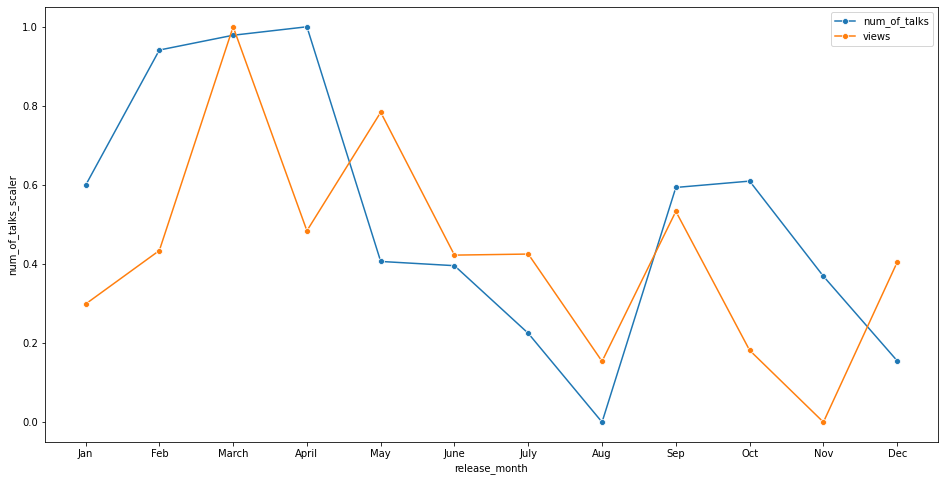

In [52]:
plt.figure(figsize=(16,8))
for i in talk_month_report.iloc[:,3:]:
  sns.lineplot(data=talk_month_report,x='release_month',y=i,marker='o')

plt.legend(talk_month_numeric)

Here we can observe that it has the comparision wise line graph for number of talks and number of views for the respective month.

Most number of videos wwere released on the month of April where the lease was released on the month of August. But the number of views were maximum for the videos which were released on the minth of March and it was lease for the videos of November.



##**Year**

In [54]:
talk_rel_year_df = pd.DataFrame(tedtalk_df['release_year'].value_counts()).reset_index()
talk_rel_year_df.rename(columns={'index':'release_year', 'release_year':'num_of_talks'}, inplace=True)

popular_year = tedtalk_df[['release_year','views']].groupby('release_year').agg({'views' : 'mean'}).sort_values('release_year',ascending=False).reset_index()

talk_year_report = talk_rel_year_df.merge(popular_year,on='release_year').sort_values('release_year')


In [55]:
#taking only numeric columns to do the minmaxscaling
talk_year_numeric = talk_year_report[['num_of_talks','views']]
#using standardization as both numeric columns are in different scale
#after words it will be easy for us to do the graphs
scaler = MinMaxScaler()
scaled = scaler.fit_transform(talk_year_numeric)
#print(scaled)
talk_year_report ['num_of_talks_scaler'] = pd.Series(scaled[i][0] for i in range(len(scaled)))
talk_year_report ['views_scaler'] = pd.Series(scaled[i][1] for i in range(len(scaled)))

In [56]:
talk_year_report

release_year  num_of_talks         views  num_of_talks_scaler  views_scaler
14          2006            49  4.937003e+06             0.248086      0.000000
13          2007           119  1.848977e+06             1.000000      0.252568
12          2008           185  1.810979e+06             0.655436      0.224291
10          2009           215  2.071610e+06             0.295559      0.450839
8           2010           230  2.188767e+06             0.292496      0.373247
4           2011           255  1.932456e+06             0.277182      0.314698
3           2012           303  2.196281e+06             0.254211      0.285484
5           2013           242  3.012435e+06             0.315467      0.250785
7           2014           240  2.423564e+06             0.295559      0.520089
9           2015           220  2.806775e+06             0.261868      0.468805
6           2016           242  2.734725e+06             0.388974      0.316572
2           2017           315  2.160378e+06             0.208270      0.220493
1           2018           477  1.826209e+06             0.107198      0.229968
0           2019           702  1.939608e+06             0.000000      1.000000
11          2020           211  9.267452e+05             0.407351      0.307619

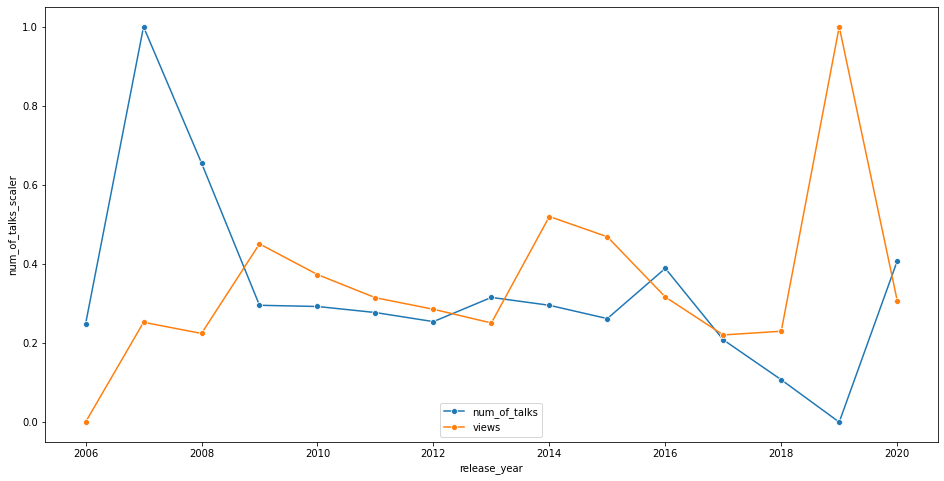

In [57]:
plt.figure(figsize=(16,8))
for i in talk_year_report.iloc[:,3:]:
  sns.lineplot(data=talk_year_report,x='release_year',y=i,marker='o')
plt.legend(labels=talk_year_numeric)

We can observe the line graph for almost 20 years of number of talks and number of views. We can conclude that Number of talks were morein old days but eventually it was reduced hit the minimum in 2019. It hits the hike in 2007 though. But the number of views were gradually increasing from year to year with a little bit of ups and downs. It was high during the 2019 when the number of talks were minimum.

In [59]:

# g = sns.FacetGrid(tedtalk_df, col='release_day', height=8, aspect=.5)

# g.map(sns.barplot, 'release_month', 'views_per_day')


#**Comment and duration columns**

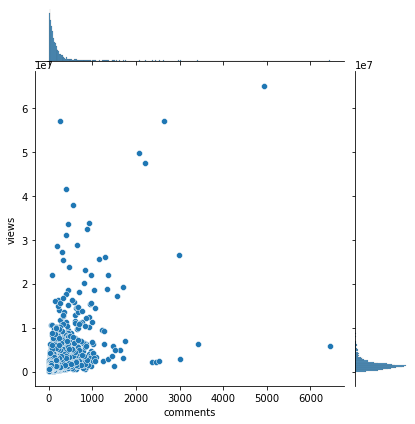

In [60]:
sns.jointplot(data=tedtalk_df,x='comments', y='views')

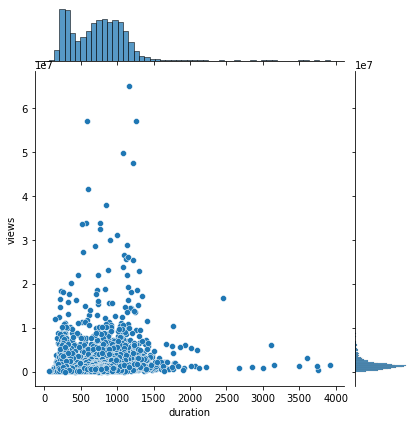

In [61]:
sns.jointplot(data=tedtalk_df,x='duration', y='views')

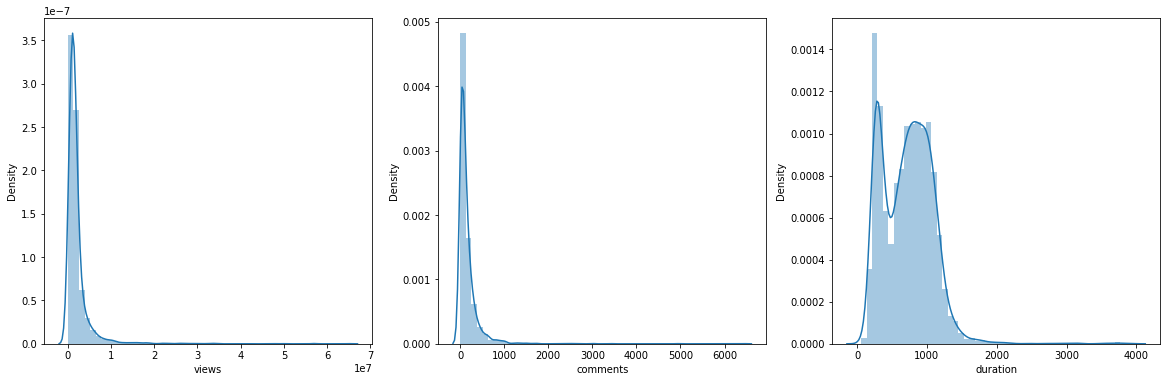

In [63]:
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
sns.distplot(tedtalk_df['views'])
plt.subplot(1,3,2)
sns.distplot(tedtalk_df['comments'])
plt.subplot(1,3,3)
sns.distplot(tedtalk_df['duration'])


We can observe the data distribution of the nukmerical columns views , comments and duration.

## **Events with respect to talks and views**

In [64]:
#count of events

event_count_df = pd.DataFrame(tedtalk_df['event'].value_counts()).reset_index()
event_count_df.rename(columns={'index':'event', 'event':'num_of_talks'}, inplace=True)

#event with max views
popular_event=tedtalk_df[['event','views']].groupby('event').agg({'views' : 'mean'}).sort_values('views',ascending=False).reset_index()

event_report = event_count_df.merge(popular_event,on='event')



In [65]:
#taking only numeric columns to do the minmaxscaling
event_numeric = event_report[['num_of_talks','views']]
#using standardization as both numeric columns are in different scale
#after words it will be easy for us to do the graphs
scaler = MinMaxScaler()
scaled = scaler.fit_transform(event_numeric)
#print(scaled)
event_report ['num_of_talks_scaler'] = pd.Series(scaled[i][0] for i in range(len(scaled)))
event_report ['views_scaler'] = pd.Series(scaled[i][1] for i in range(len(scaled)))


Text(0.5, 1.0, 'Events with top 10 views followed by their number of talks')

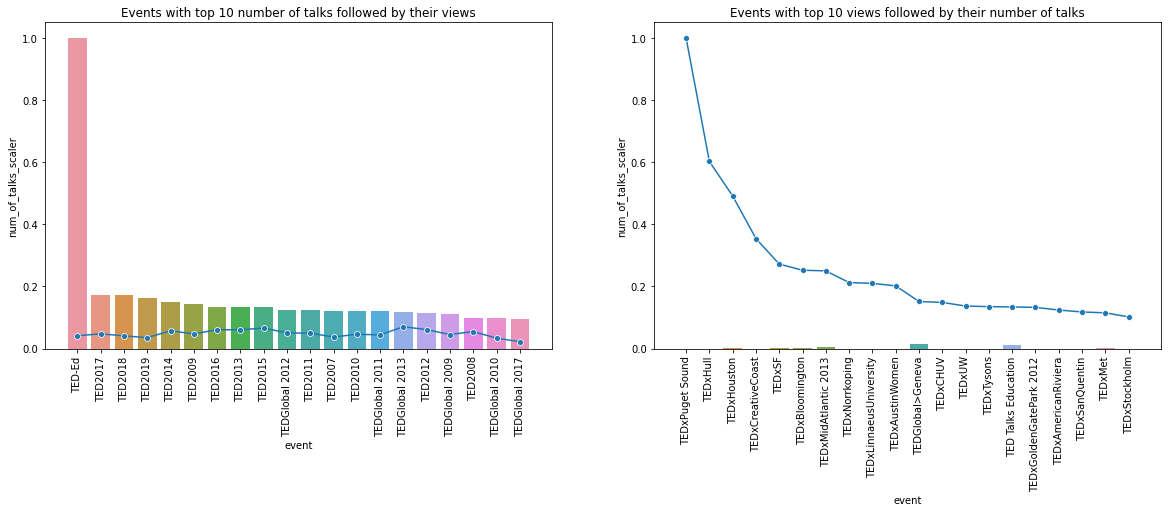

In [66]:
# graph for event which has maximum talks with respect to views
event_talk_views_report_1 = event_report.sort_values('num_of_talks',ascending=False).head(20)
event_talk_views_report_2 = event_report.sort_values('views',ascending=False).head(20)
# # plotting the graph

plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
plt.xticks(rotation=90)
sns.barplot(x='event',y='num_of_talks_scaler',data = event_talk_views_report_1)
sns.lineplot(x='event',y='views_scaler',data=event_talk_views_report_1,marker='o')
plt.title('Events with top 10 number of talks followed by their views')

plt.subplot(1,2,2)
plt.xticks(rotation=90)
sns.barplot(x='event',y='num_of_talks_scaler',data = event_talk_views_report_2)
sns.lineplot(x='event',y='views_scaler',data=event_talk_views_report_2,marker='o')
plt.title('Events with top 10 views followed by their number of talks')


This graph represents the number of views for the different views along with the number of talks. We can observe that the count of number of talks of event did not really matter for views. For top 10 events in the first graph, the number of views is almost the same. And in the second graph, for the top 10 nummber of views, event's number of talks were very low. 

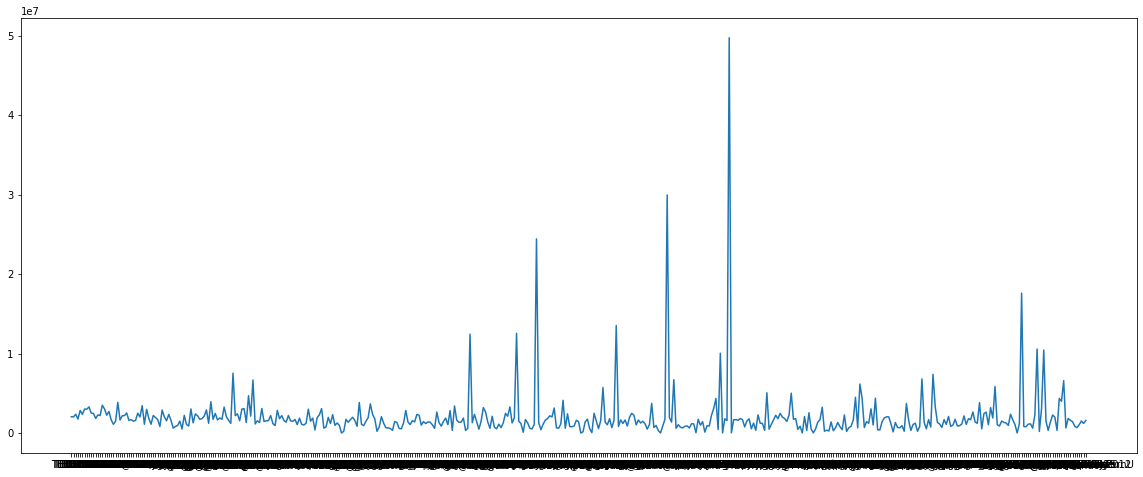

In [67]:
plt.figure(figsize=(20,8))
plt.plot(event_report['event'],event_report['views'])

This explains about the different events with respect to the number of views. And we can see some hikes in number of views for very few events in here. 

# **Native lang column**

In [68]:
tedtalk_df['native_lang'].nunique()

12

In [69]:
native_lang_df = pd.DataFrame(tedtalk_df['native_lang'].value_counts()).reset_index()

native_lang_df.rename(columns={'index':'native_lang', 'native_lang':'num_of_talks'}, inplace=True)

#event with max views
popular_lang=tedtalk_df[['native_lang','views']].groupby('native_lang').agg({'views' : 'mean'}).sort_values('views',ascending=False).reset_index()

lang_report = native_lang_df.merge(popular_lang,on='native_lang')

In [70]:
#taking only numeric columns to do the minmaxscaling
lang_numeric = event_report[['num_of_talks','views']]
#using standardization as both numeric columns are in different scale
#after words it will be easy for us to do the graphs
scaler = MinMaxScaler()
scaled = scaler.fit_transform(lang_numeric)
#print(scaled)
lang_report ['num_of_talks_scaler'] = pd.Series(scaled[i][0] for i in range(len(scaled)))
lang_report ['views_scaler'] = pd.Series(scaled[i][1] for i in range(len(scaled)))

native_lang  num_of_talks         views  num_of_talks_scaler  views_scaler
0           en          3957  2.163597e+06             1.000000      0.041120
1           es            27  6.898032e+05             0.171171      0.040824
2           fr             9  9.825846e+05             0.171171      0.047425
3           ja             3  6.802843e+05             0.162162      0.035154
4           hi             2  5.768520e+05             0.149550      0.057226
5           de             1  8.848810e+05             0.144144      0.047162
6           pt             1  3.475180e+05             0.133333      0.060661
7           ko             1  2.057706e+06             0.133333      0.060288
8        zh-cn             1  1.368494e+06             0.133333      0.066117
9           ar             1  1.452611e+06             0.124324      0.050363
10       pt-br             1  1.167889e+06             0.124324      0.049576
11          it             1  3.466037e+06             0.120721      0.037102

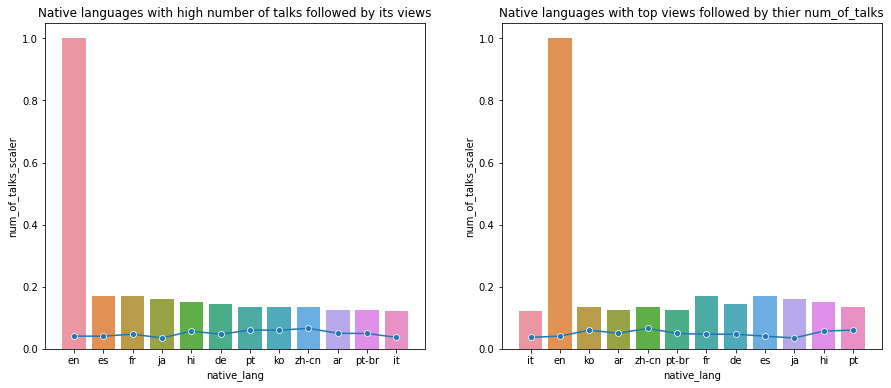

In [71]:
# graph for langauges which has maximum talks with respect to views
#lang_report.sort_values('views',ascending=False,inplace=True)
# # plotting the graph
lang_report_1 = lang_report.sort_values('num_of_talks',ascending=False)
lang_report_2 = lang_report.sort_values('views',ascending=False)

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.barplot(x='native_lang',y='num_of_talks_scaler',data = lang_report_1)
sns.lineplot(x='native_lang',y='views_scaler',data=lang_report_1,marker='o')
plt.title('Native languages with high number of talks followed by its views')

plt.subplot(1,2,2)
sns.barplot(x='native_lang',y='num_of_talks_scaler',data = lang_report_2)
sns.lineplot(x='native_lang',y='views_scaler',data=lang_report_2,marker='o')
plt.title('Native languages with top views followed by thier num_of_talks')

lang_report

We can see the different native languages avaliable, number of talks in those languages and number of views it received.
In the first graph we can see the charts which are sorted according to the number of talks. Obviously english being the common langauge, has most numer of talks. But it did not ensure abou tthe number of views. The second graph contains the charts which are sorted according to number of views. And we can see that Portuguese has received maximum average views for its talks.

# **Available lang column**

## **subtitles count for all videos**

In [72]:
lang_dict = {}
for i in tedtalk_df.to_dict('records'):
   tmp = i['available_lang']
   for j in tmp:
    if j in lang_dict:
      lang_dict[j] += 1
    else:
      lang_dict[j] = 1 
lang_df = pd.DataFrame(lang_dict.values(),index=lang_dict.keys(),columns=['count']).head(20).reset_index().sort_values('count',ascending=False)



In [73]:
lang_df

index  count
5      en   4005
6      es   3915
8      fr   3863
0      ar   3841
19     ko   3755
18     ja   3482
17     it   3459
12     he   3295
7      fa   3009
15     hu   2871
3      de   2698
4      el   2538
1      bg   2148
14     hr   1856
16     id   1733
2      cs   1543
13     hi    502
9   fr-ca    334
10     gl    323
11     gu    164

Text(0, 0.5, 'Counts')

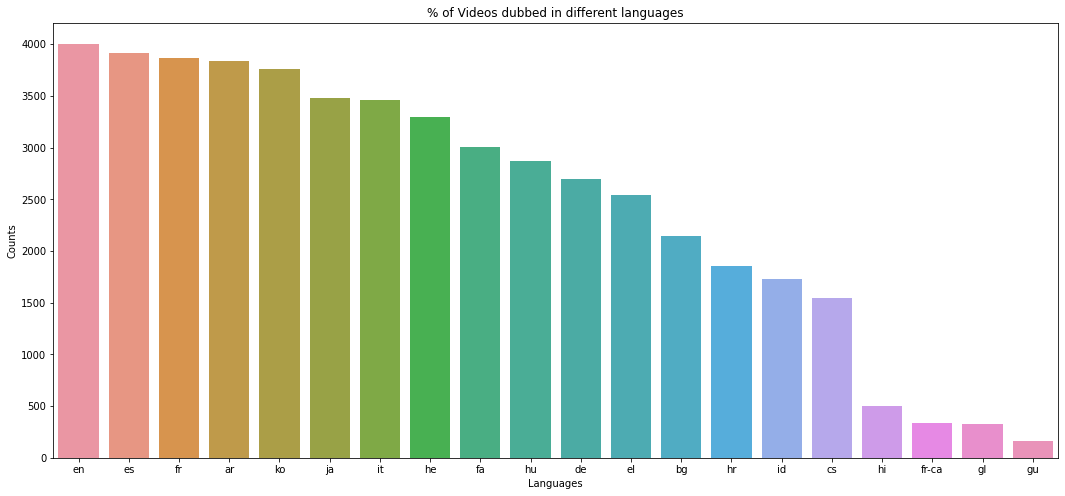

In [74]:
plt.figure(figsize=(18,8))
plt.title('% of Videos dubbed in different languages')
ax = sns.barplot(x='index',y='count',data=lang_df)
plt.xlabel("Languages")
plt.ylabel('Counts')



This graphs gives the idea about how many languages were available as subtitles for the videos. And again English comes in top as its the common language all over the worls.

#**topics column**

In [75]:
tedtalk_df['topics']

0       [alternative energy, cars, climate change, cul...
1       [Africa, Asia, Google, demo, economics, global...
2       [computers, entertainment, interface design, m...
3       [MacArthur grant, activism, business, cities, ...
4       [children, creativity, culture, dance, educati...
                              ...                        
4000    [activism, data, technology, mental health, so...
4001    [TED-Ed, education, history, animation, intell...
4002         [society, law, policy, justice system, TEDx]
4003    [TED-Ed, education, animation, United States, ...
4004    [animals, TED-Ed, animation, oceans, science, ...
Name: topics, Length: 4005, dtype: object

In [76]:
topics_df = pd.DataFrame(tedtalk_df['topics'].explode().value_counts().reset_index()).iloc[:,0:]
topics_df.rename(columns={'index':'Topics','topics':'Number_of_talks'},inplace=True)



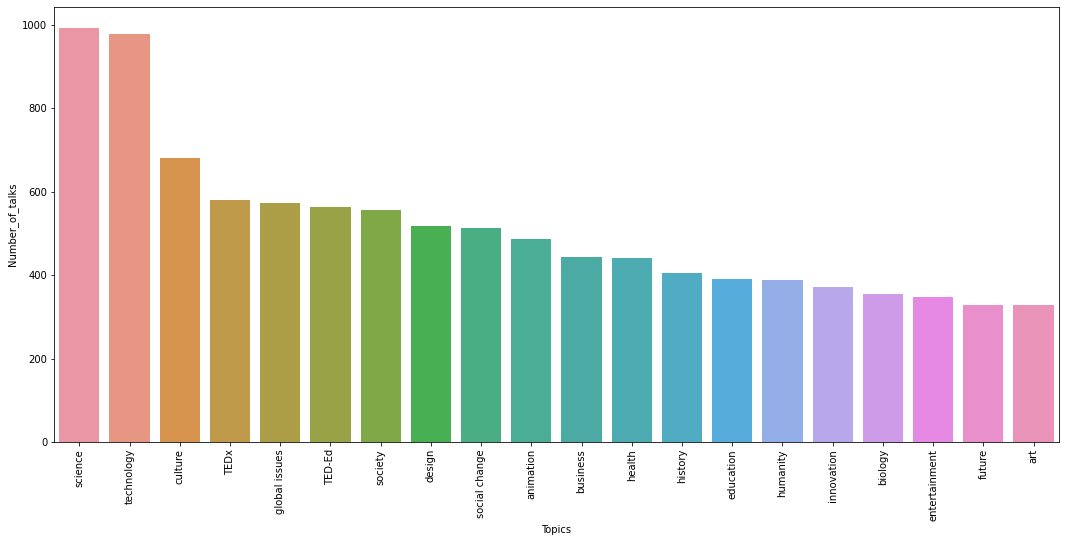

In [77]:
plt.figure(figsize=(18,8))
plt.xticks(rotation=90)
sns.barplot(x='Topics',y='Number_of_talks',data=topics_df.head(20))

We can see that the most talks in TED talk were about Science and technology.

##**Wordcloud for topics**

In [78]:
from wordcloud import WordCloud
text = " ".join(topics_df['Topics'])
word_cloud = WordCloud(max_words=100,collocations = False, background_color = 'white').generate(text)

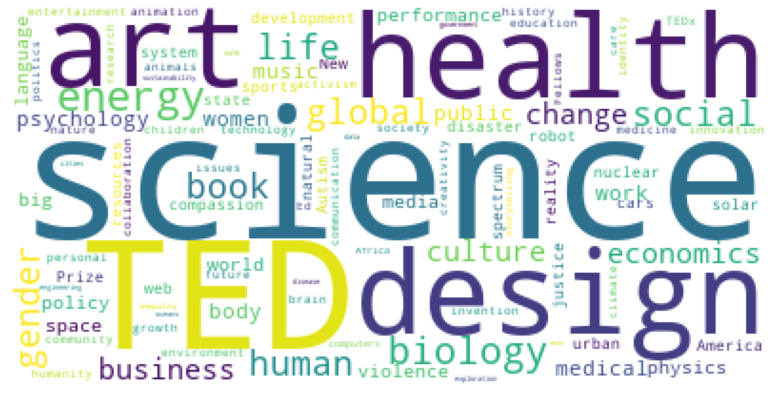

In [79]:
plt.figure(figsize=(16,7))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

#**description column** 

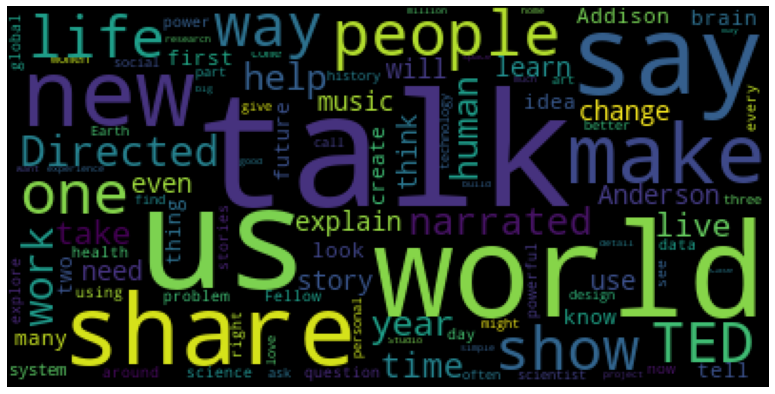

In [80]:
text = " ".join(tedtalk_df['description'])
word_cloud = WordCloud(max_words=100,collocations = False, background_color = 'black').generate(text)
plt.figure(figsize=(16,7))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

#**title column**

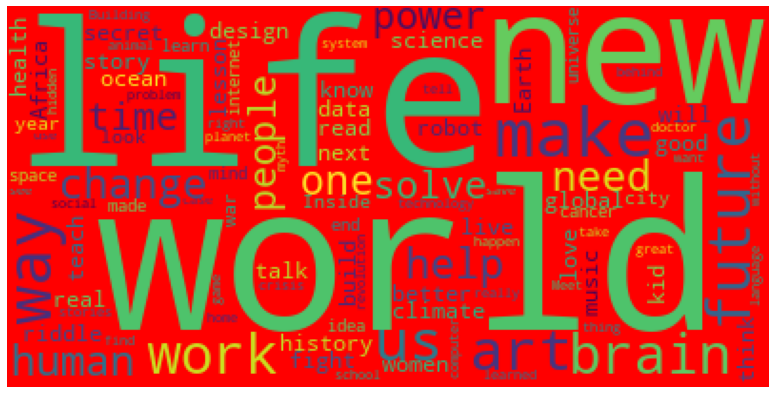

In [81]:
text = " ".join(tedtalk_df['title'])
word_cloud = WordCloud(max_words=100,collocations = False, background_color = 'red').generate(text)
plt.figure(figsize=(16,7))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

#**Heatmap**

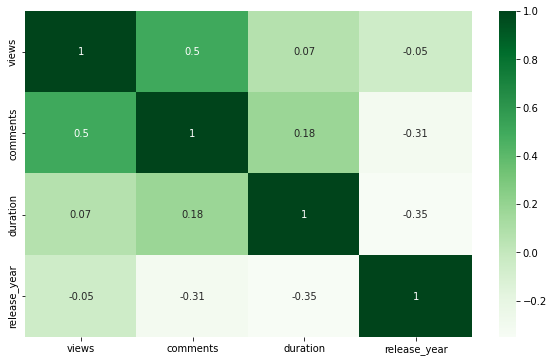

In [82]:
plt.figure(figsize=(10,6))
sns.heatmap(round(tedtalk_df.corr(),2),annot=True,cmap='Greens');

Trying to get a correlation matrix with visualization for the numeric columns. We can observe no 2 column share correlation more than 60%

In [83]:
td_talk_df_2 = tedtalk_df.copy()

#**Missing values in  Comments**

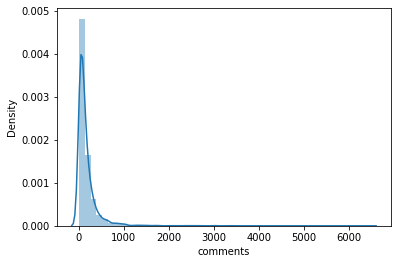

In [84]:
sns.distplot(tedtalk_df.comments.dropna())

In [85]:
numeric_df = tedtalk_df[['views','comments','duration']]

As more than 3% of the data were missing in Comments, we tried using the KNN imouter to predict the missing values in here.

In [86]:
#KNN to find the missing values

from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

# Doing dummy for categorical variables
numeric_df = pd.get_dummies(numeric_df)

# Defining scaler and imputer objects
scaler = StandardScaler()
imputer = KNNImputer()

# Imputing missing values with KNN if any
numeric_df['comments'] = imputer.fit_transform((numeric_df['comments'].values.reshape(-1,1)))

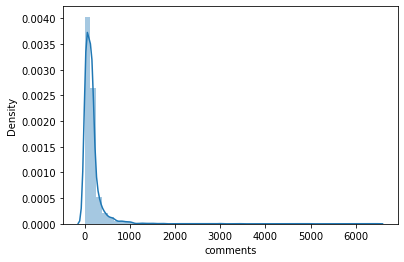

In [87]:
sns.distplot(numeric_df['comments'])

In [88]:
tedtalk_df['comments']=numeric_df['comments']
tedtalk_df.isna().sum()

title                 0
speaker_1             0
about_speakers        0
views                 0
recorded_date         0
published_date        0
event                 0
native_lang           0
available_lang        0
comments              0
duration              0
topics                0
related_talks         0
description           0
transcript            0
release_day           0
release_month         0
release_year          0
speaker_occupation    0
dtype: int64

In [89]:
ted_talk_3_df = tedtalk_df.copy()


# **Handling** **Outliers**

In [90]:
tedtalk_df.describe().T
#we can see that we have only numerical columns in here.
#talk_id is the unique number which should not be considered
#views is the dependent variable which should not be considered
# so we consider only comments and duration.

count          mean  ...        75%         max
views         4005.0  2.148006e+06  ...  2133110.0  65051954.0
comments      4005.0  1.619970e+02  ...      162.0      6449.0
duration      4005.0  7.240112e+02  ...      974.0      3922.0
release_year  4005.0  2.014597e+03  ...     2018.0      2020.0

[4 rows x 8 columns]

In [91]:
continous = ['comments','duration']

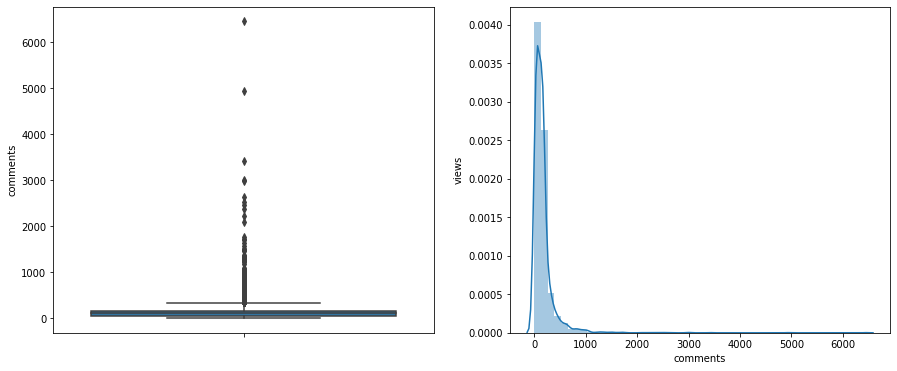

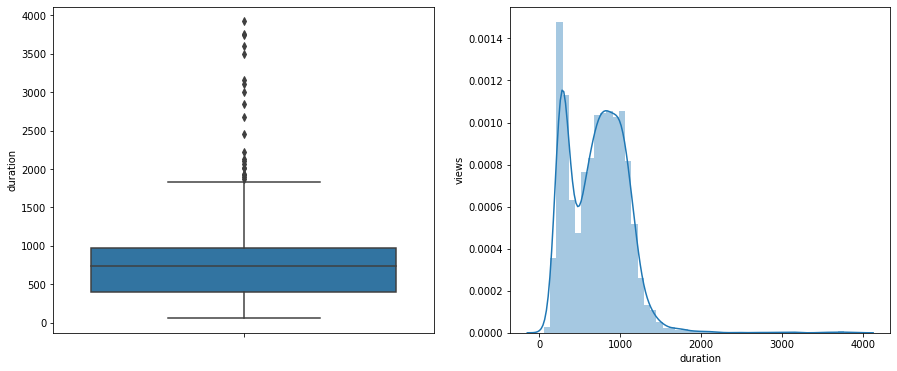

In [92]:
for var in continous:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=tedtalk_df[var])
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(tedtalk_df[var])
    fig.set_ylabel('views')
    fig.set_xlabel(var)

    plt.show()

In [94]:
 tedtalk_df[['comments','duration']].describe().T


count        mean         std   min    25%    50%    75%     max
comments  4005.0  161.997015  245.868383   0.0   46.0  119.0  162.0  6449.0
duration  4005.0  724.011236  361.775462  60.0  393.0  738.0  974.0  3922.0

In [95]:

#comments
#Finding IQR
Q3, Q1 = np.percentile(tedtalk_df['comments'], [75 ,25])
IQR = Q3 - Q1
upper = Q3 +1.5*IQR
lower = Q1 - 1.5*IQR

In [96]:
tedtalk_df.loc[tedtalk_df['comments']>upper,'comments'] = upper

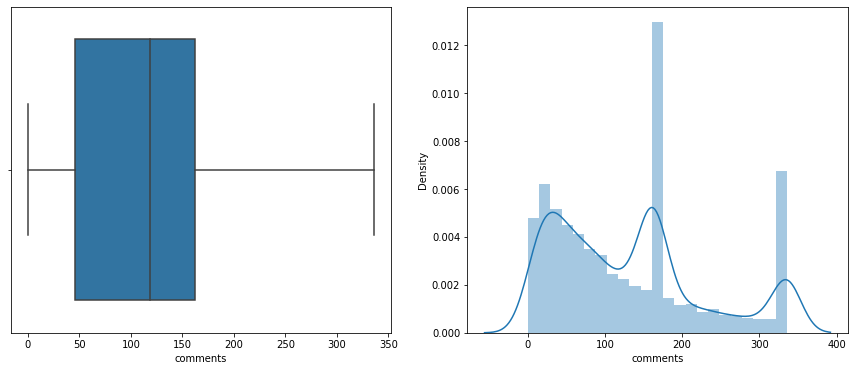

In [97]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.boxplot(tedtalk_df['comments'])
plt.subplot(1, 2, 2)
sns.distplot(tedtalk_df['comments'])

In [98]:
tedtalk_df[['comments','duration']].describe().T

count        mean         std   min    25%    50%    75%     max
comments  4005.0  131.469175   98.182881   0.0   46.0  119.0  162.0   336.0
duration  4005.0  724.011236  361.775462  60.0  393.0  738.0  974.0  3922.0

In [99]:
#duration
#Finding IQR
Q3, Q1 = np.percentile(tedtalk_df['duration'], [75 ,25])
IQR = Q3 - Q1
upper = Q3 +1.5*IQR
lower = Q1 - 1.5*IQR

In [100]:
tedtalk_df.loc[tedtalk_df['duration']>upper,'duration'] = upper
#borderizing the outliers

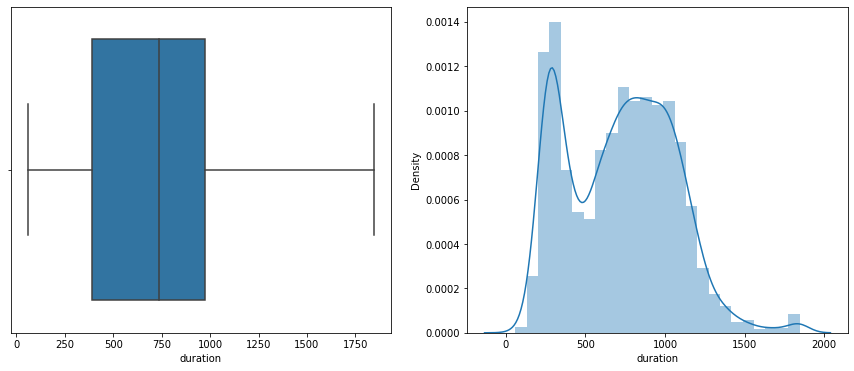

In [101]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.boxplot(tedtalk_df['duration'])
plt.subplot(1, 2, 2)
sns.distplot(tedtalk_df['duration'])
# plt.figure(figsize=(15,6))
# plt.subplot(1, 2, 1)
# sns.boxplot(tedtalk_df['duration'])
# plt.subplot(1, 2, 2)
# sns.distplot(tedtalk_df['duration'])

Here to treat outliers, we have used IQR method. Whatever the data were more than the Q3+1.5*IQR we tried equating it into upper range only. Only Comments and duration were treated this way. 

To treat outliers in views cl=olumn which was a dependent column we tried using the Z score.

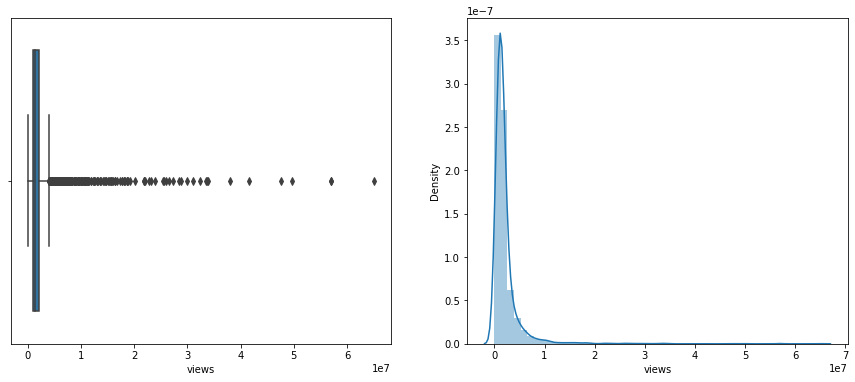

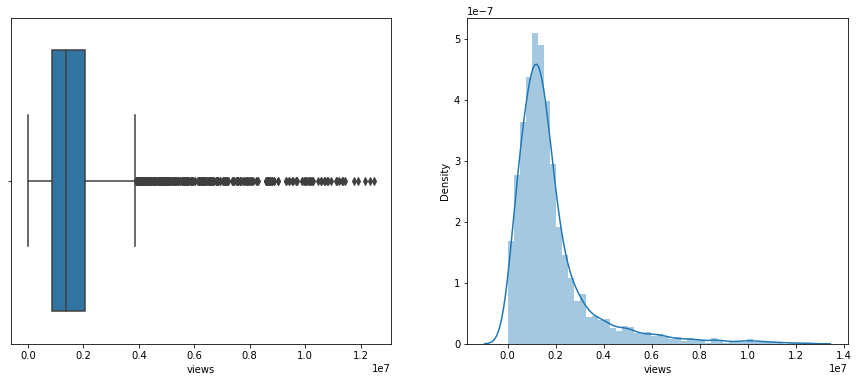

In [102]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.boxplot(tedtalk_df['views'])
plt.subplot(1, 2, 2)
sns.distplot(tedtalk_df['views'])


tedtalk_df = tedtalk_df[((tedtalk_df['views'] - tedtalk_df['views'].mean()) / tedtalk_df['views'].std()).abs() < 3]

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.boxplot(tedtalk_df['views'])
plt.subplot(1, 2, 2)
sns.distplot(tedtalk_df['views'])

In [108]:
ted_talk_2_df = tedtalk_df.copy()

In [109]:
tedtalk_df = tedtalk_df.reset_index()

In [110]:
tedtalk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3945 entries, 0 to 3944
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               3945 non-null   int64         
 1   title               3945 non-null   object        
 2   speaker_1           3945 non-null   object        
 3   about_speakers      3945 non-null   object        
 4   views               3945 non-null   int64         
 5   recorded_date       3945 non-null   datetime64[ns]
 6   published_date      3945 non-null   datetime64[ns]
 7   event               3945 non-null   object        
 8   native_lang         3945 non-null   object        
 9   available_lang      3945 non-null   object        
 10  comments            3945 non-null   float64       
 11  duration            3945 non-null   float64       
 12  topics              3945 non-null   object        
 13  related_talks       3945 non-null   object      

# **Feature** **Engineering**

Now we start with the Feature engineering, we create a new variable from the existing one or we alter the existing variable into the new one to enhance the performance of the model.

In [111]:
from datetime import date
today = pd.to_datetime(date.today(), format='%Y-%m-%d')

In [112]:
#creating a column with video age
tedtalk_df['video_age'] = (today - tedtalk_df['published_date']).apply(lambda x: x.days)
# Creating a daily views column
tedtalk_df['views_per_day'] = tedtalk_df['views'] / ( tedtalk_df['video_age'] + 1 )

In [113]:

#Finding average views according to first speaker
tedtalk_df['speaker_1_average_views'] = tedtalk_df['speaker_1'].map(list(tedtalk_df.groupby('speaker_1').agg({'views_per_day' : 'mean'}).
                                                         sort_values(['views_per_day'],ascending=False).to_dict().values())[0])

#Finding average views according to event 
tedtalk_df['event_average_views'] = tedtalk_df['event'].map(list(tedtalk_df.groupby('event').agg({'views_per_day' : 'mean'}).
                                                 sort_values(['views_per_day'],ascending=False).to_dict().values())[0])


In [114]:
#Checking for unique topic
unique_topics=[]
for i in range(0,len(tedtalk_df)):
  temp=tedtalk_df['topics'][i]
  for i in temp:
    if(i not in unique_topics):
      unique_topics.append(i)

      
# Creating a dictionary with unique topics wrt average views
unique_topics_avg_view_dict={}
for topic in unique_topics:
  temp, count = 0, 0

  for i in range(0,len(tedtalk_df)):
    temp2=tedtalk_df['topics'][i]
    if(topic in temp2):
      temp+=tedtalk_df['views_per_day'][i]
      count+=1
  unique_topics_avg_view_dict[topic]=temp//count

# Creating a list and appending with average views wrt topic
topics_wise_average_views=[]
for i in range(0,len(tedtalk_df)):
  temp=0
  temp_topic=tedtalk_df['topics'][i]
  for element in temp_topic:
    temp+= unique_topics_avg_view_dict[element]
  
  topics_wise_average_views.append(temp//len(temp_topic))


In [115]:

# Creating a new columns with average topic views
tedtalk_df['topics_wise_avg_views'] = pd.Series(topics_wise_average_views).values

# Creating a unique topics column which contain number of unique topics spoken on in an event
tedtalk_df['unique_topics'] = tedtalk_df['topics'].str.len()

In [116]:
tedtalk_df['subtitles_count'] = tedtalk_df.available_lang.apply(lambda x: len(x))

tedtalk_df['Telecasted_after'] = (tedtalk_df['published_date'] - tedtalk_df['recorded_date']).apply(lambda x: x.days)
#creating a new variable 'telecasted after' which holds the difference between published date and recorded date


In [117]:
tedtalk_df.head(2)

index                        title  ... subtitles_count Telecasted_after
0      0  Averting the climate crisis  ...              43              122
1      2             Simplicity sells  ...              26              123

[2 rows x 28 columns]

In [118]:
tedtalk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3945 entries, 0 to 3944
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   index                    3945 non-null   int64         
 1   title                    3945 non-null   object        
 2   speaker_1                3945 non-null   object        
 3   about_speakers           3945 non-null   object        
 4   views                    3945 non-null   int64         
 5   recorded_date            3945 non-null   datetime64[ns]
 6   published_date           3945 non-null   datetime64[ns]
 7   event                    3945 non-null   object        
 8   native_lang              3945 non-null   object        
 9   available_lang           3945 non-null   object        
 10  comments                 3945 non-null   float64       
 11  duration                 3945 non-null   float64       
 12  topics                   3945 non-

In [119]:
df = tedtalk_df[['comments','duration','release_day','release_month','release_year',
                 'Telecasted_after','video_age','views_per_day','speaker_1_average_views','event_average_views','topics_wise_avg_views','unique_topics','subtitles_count']]
                 #taking only imp columns

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3945 entries, 0 to 3944
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   comments                 3945 non-null   float64
 1   duration                 3945 non-null   float64
 2   release_day              3945 non-null   object 
 3   release_month            3945 non-null   object 
 4   release_year             3945 non-null   int64  
 5   Telecasted_after         3945 non-null   int64  
 6   video_age                3945 non-null   int64  
 7   views_per_day            3945 non-null   float64
 8   speaker_1_average_views  3945 non-null   float64
 9   event_average_views      3945 non-null   float64
 10  topics_wise_avg_views    3945 non-null   float64
 11  unique_topics            3945 non-null   int64  
 12  subtitles_count          3945 non-null   int64  
dtypes: float64(6), int64(5), object(2)
memory usage: 400.8+ KB


In [121]:
df.describe().T

count         mean  ...          75%           max
comments                 3945.0   129.010664  ...   161.997015    336.000000
duration                 3945.0   717.511787  ...   970.000000   1845.500000
release_year             3945.0  2014.625602  ...  2018.000000   2020.000000
Telecasted_after         3945.0   306.804309  ...   228.000000   8804.000000
video_age                3945.0  2557.854753  ...  3744.000000   5701.000000
views_per_day            3945.0   984.086629  ...  1290.844465  10979.149171
speaker_1_average_views  3945.0   984.086629  ...  1312.145138   9955.573852
event_average_views      3945.0   984.086629  ...  1538.661405   7653.272658
topics_wise_avg_views    3945.0  1027.842839  ...  1169.000000   1840.000000
unique_topics            3945.0     7.930038  ...    10.000000     33.000000
subtitles_count          3945.0    25.076299  ...    31.000000     73.000000

[11 rows x 8 columns]

In [122]:
df.columns

Index(['comments', 'duration', 'release_day', 'release_month', 'release_year',
       'Telecasted_after', 'video_age', 'views_per_day',
       'speaker_1_average_views', 'event_average_views',
       'topics_wise_avg_views', 'unique_topics', 'subtitles_count'],
      dtype='object')

Now that more variables are created in the abovve steps, we check for the outlier once again to make sure that our data is free of outliers.

In [124]:
def remove_outlier(df,column):
  
  plt.figure(figsize=(15,6))
  plt.subplot(1, 2, 1)
  plt.title('Before Treating outliers')
  sns.boxplot(df[column])
  plt.subplot(1, 2, 2)
  sns.distplot(df[column])
  df = df[((df[column] - df[column].mean()) / df[column].std()).abs() < 3]
  
  plt.figure(figsize=(15,6))
  
  plt.subplot(1, 2, 1)
  plt.title('After Treating outliers')
  sns.boxplot(df[column])
  plt.subplot(1, 2, 2)
  sns.distplot(df[column])


In [125]:
df.describe().columns

Index(['comments', 'duration', 'release_year', 'Telecasted_after', 'video_age',
       'views_per_day', 'speaker_1_average_views', 'event_average_views',
       'topics_wise_avg_views', 'unique_topics', 'subtitles_count'],
      dtype='object')

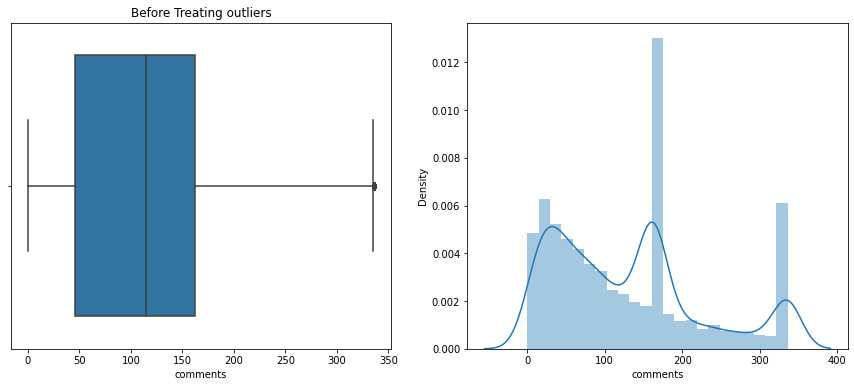

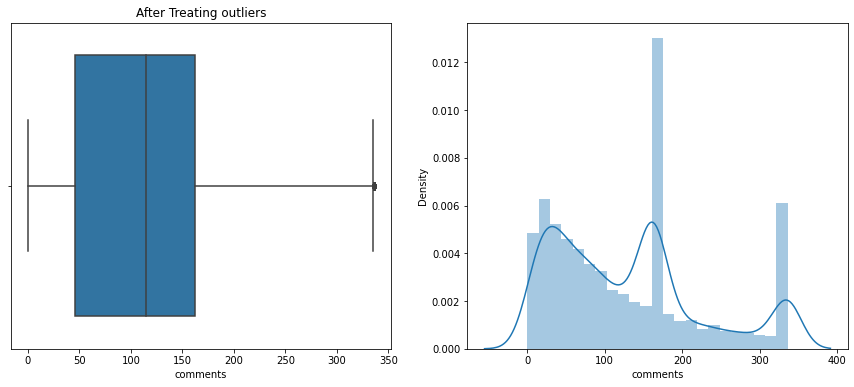

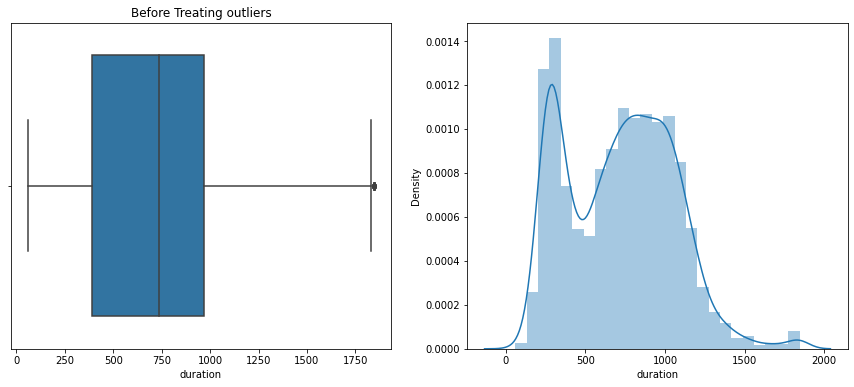

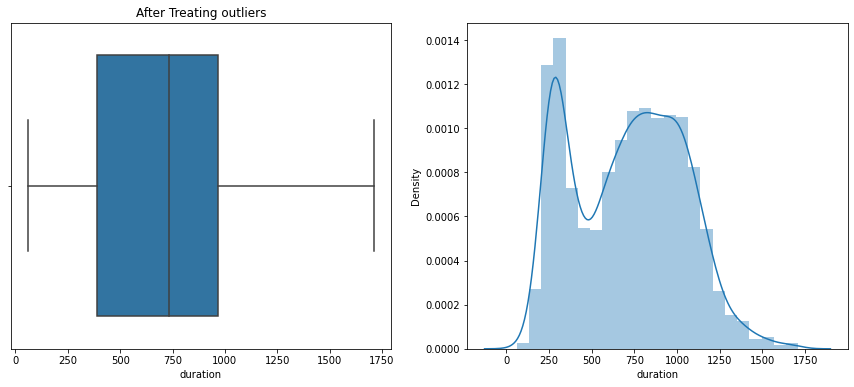

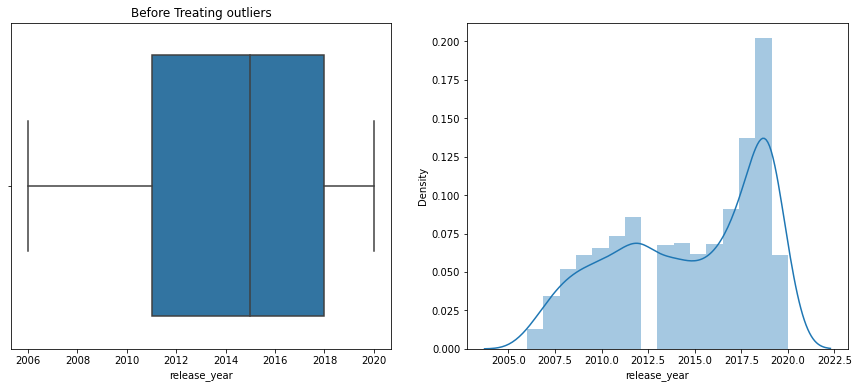

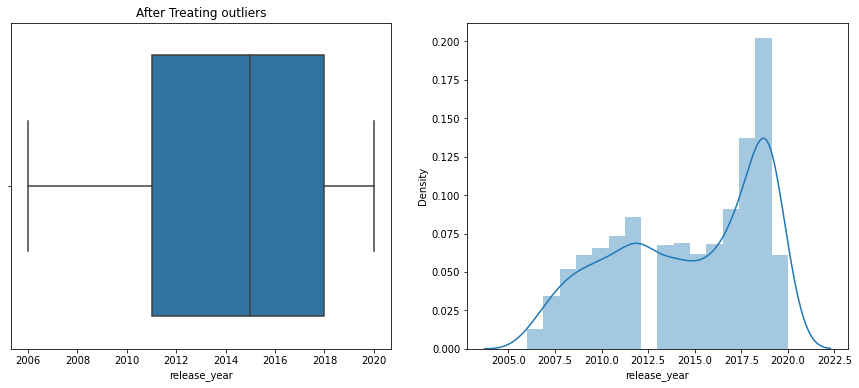

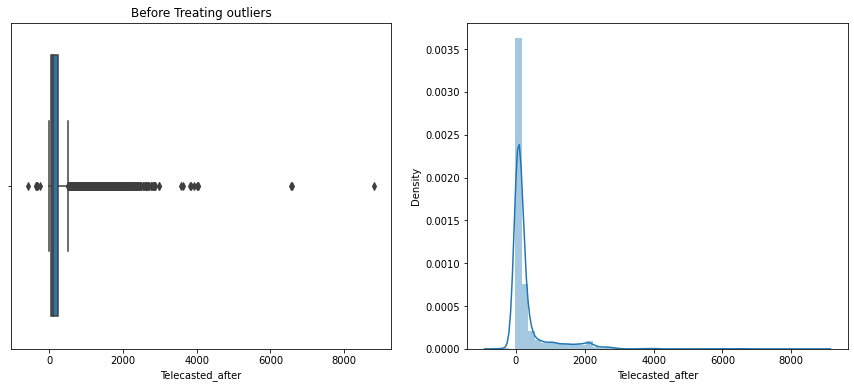

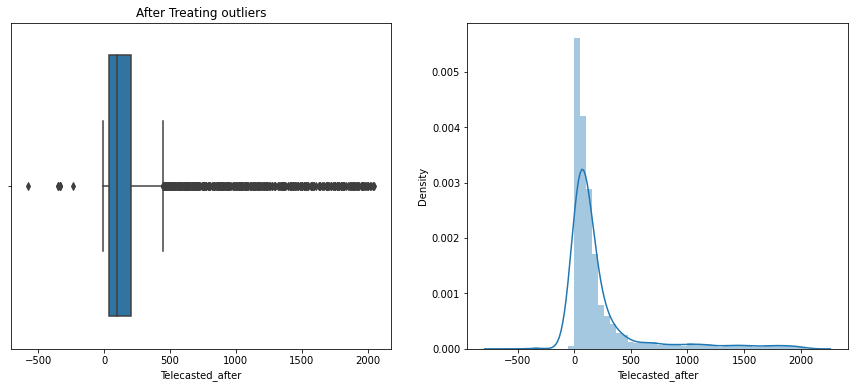

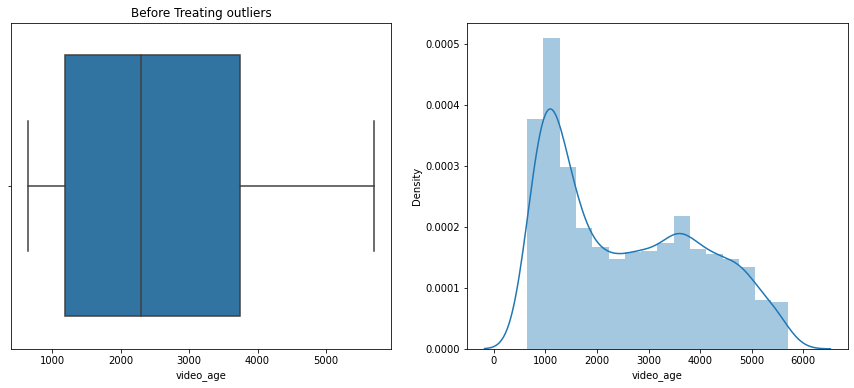

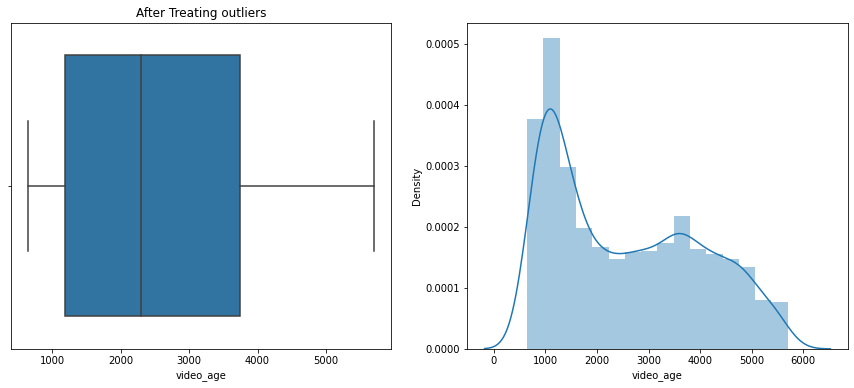

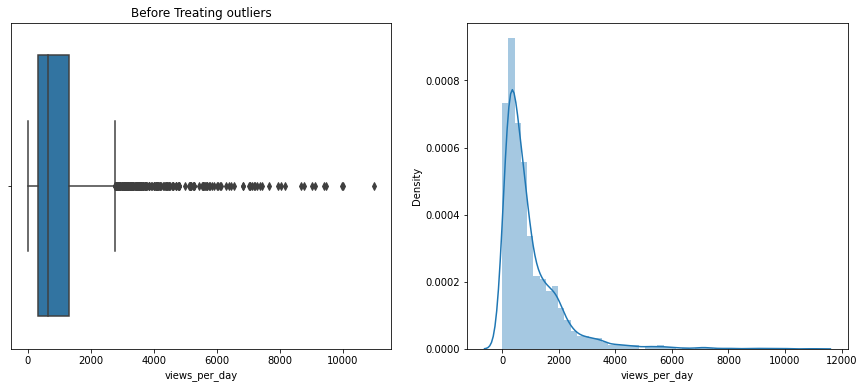

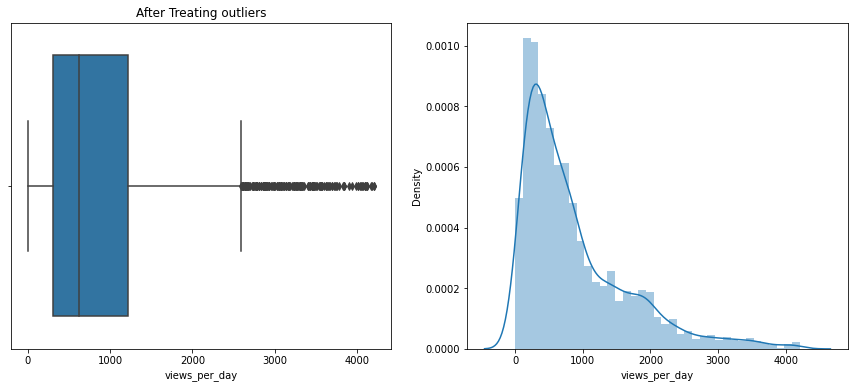

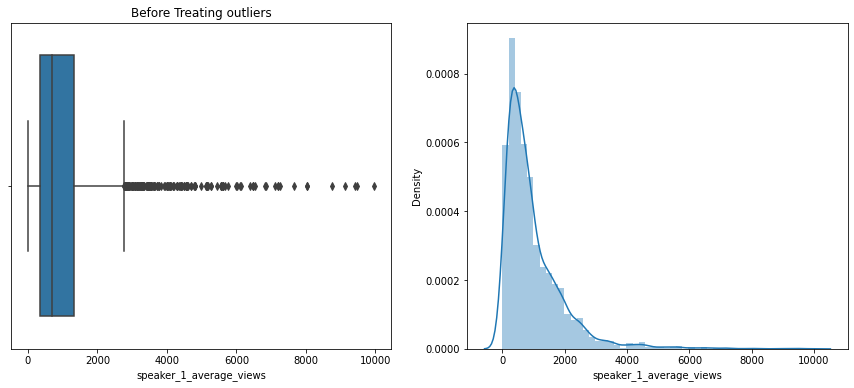

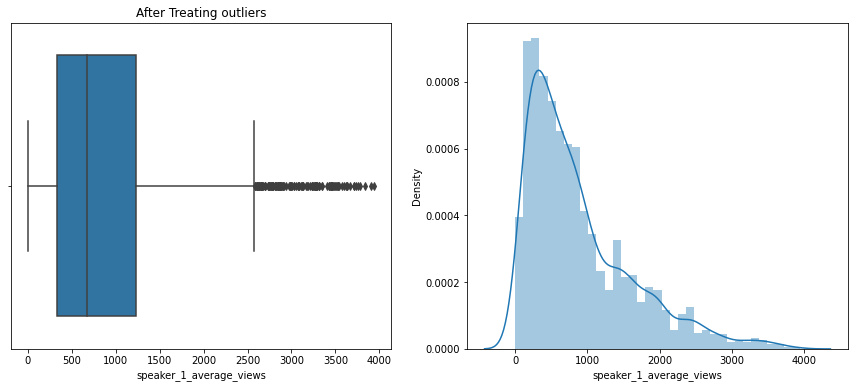

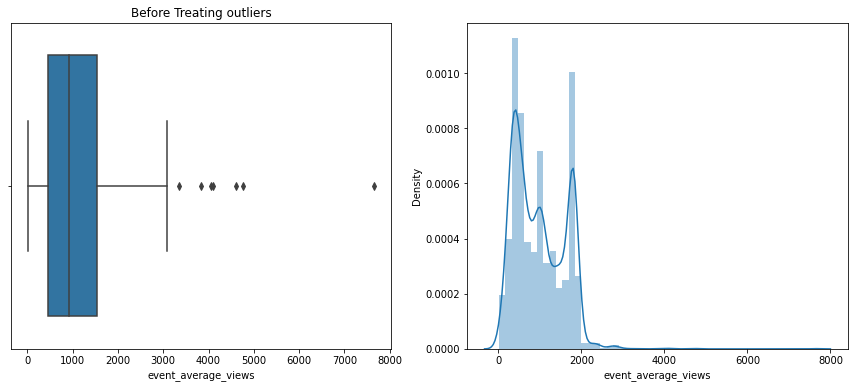

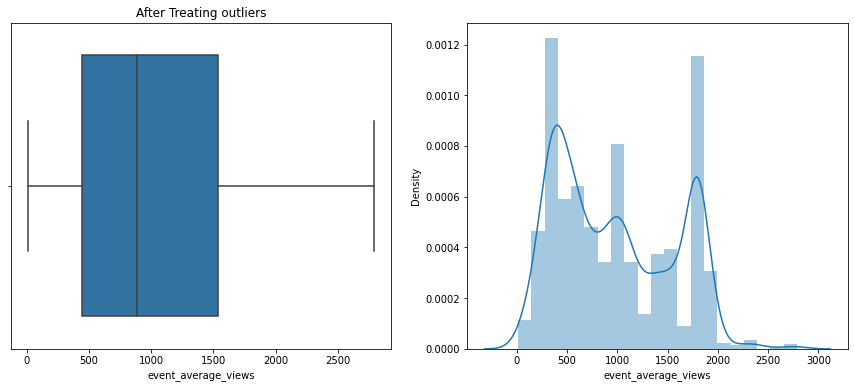

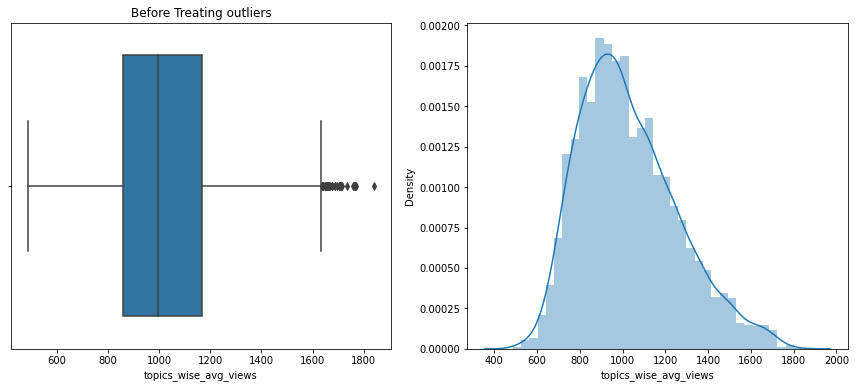

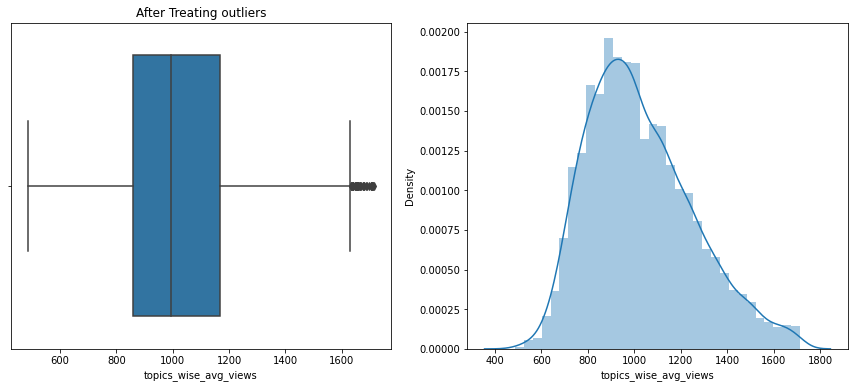

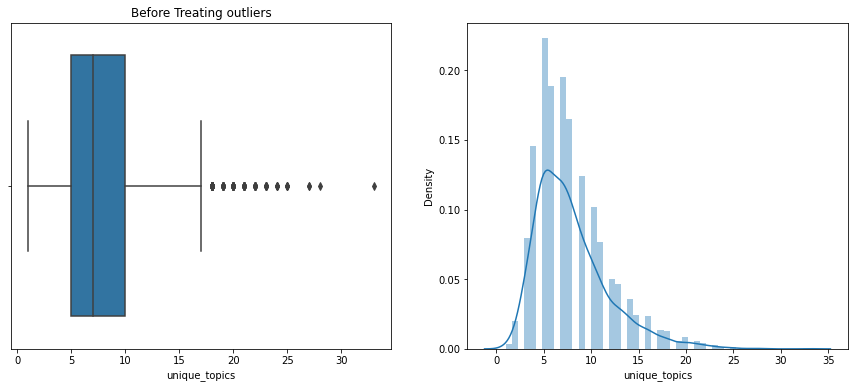

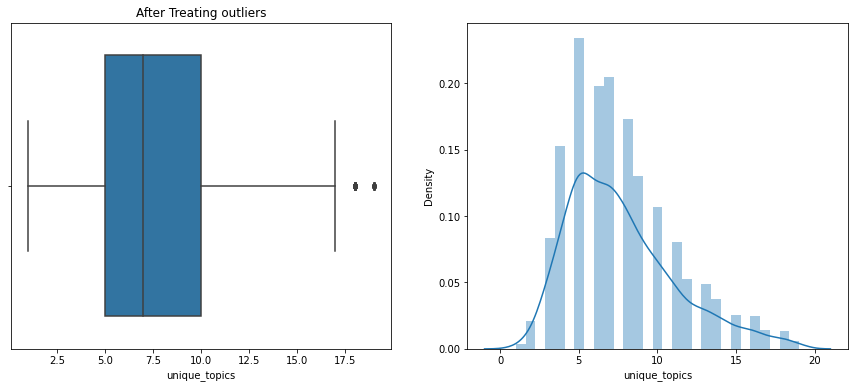

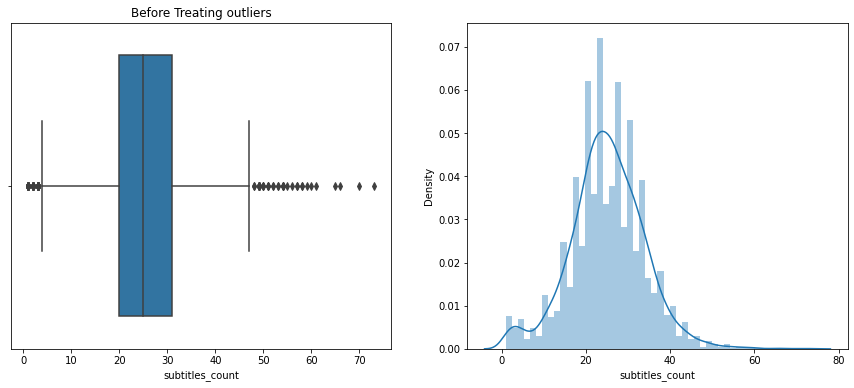

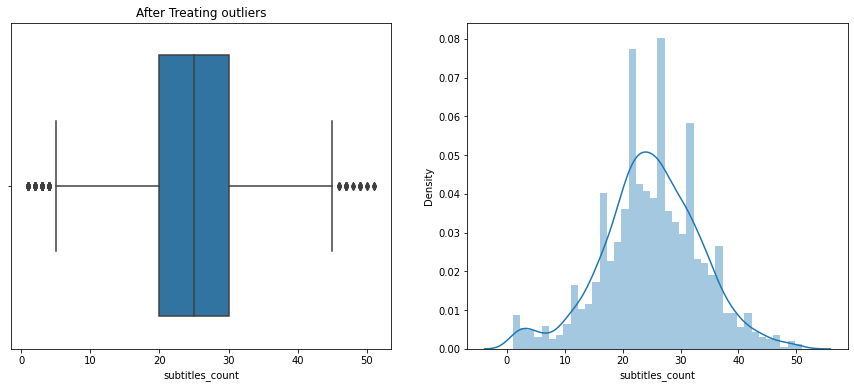

In [126]:
for column in df.describe().columns:
  remove_outlier(df,column)

In [127]:
df.drop('Telecasted_after',axis=1,inplace=True)
#It has alot of outliers...better not to consider it

In [128]:
df_2 = df.copy()

#**Checking the conditions for LR**

Now that Feature engineering is done, we need to start with train test split and start building our models. But since we are trying to start with linear regression in here, we need to check several criterias for LR.

In [129]:
# defining in X and Y
y = df['views_per_day']
X = df.drop(columns=['views_per_day'])

In [131]:
X.head(2)

comments  duration  ... unique_topics subtitles_count
0     272.0     977.0  ...             9              43
1     124.0    1286.0  ...             9              26

[2 rows x 11 columns]

In [132]:
#to check multicollinearity, normal distribution, we need only numerical data, we dont want categorical variable
X_without_categorical_variable  = X[['comments', 'duration','video_age', 'speaker_1_average_views',
                                      'event_average_views', 'topics_wise_avg_views', 'unique_topics','subtitles_count']]

# to check linearity with the dependent variable.
df_without_categorical_variable =  df[['comments', 'duration','video_age','views_per_day','speaker_1_average_views',
                                      'event_average_views', 'topics_wise_avg_views', 'unique_topics','subtitles_count']]

##**1)Checking linearity between the dependednt and independent variables**

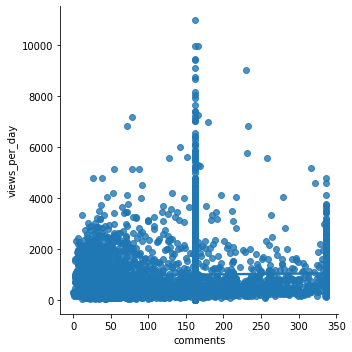

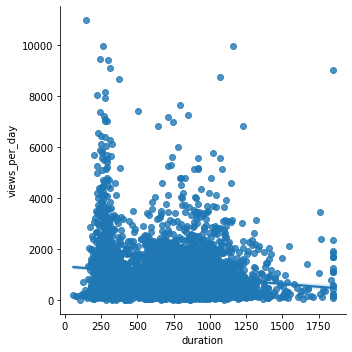

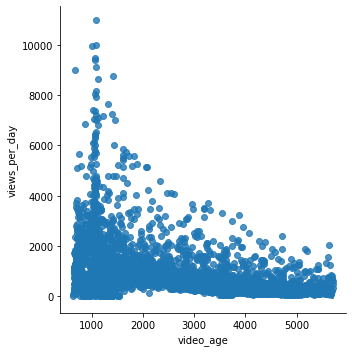

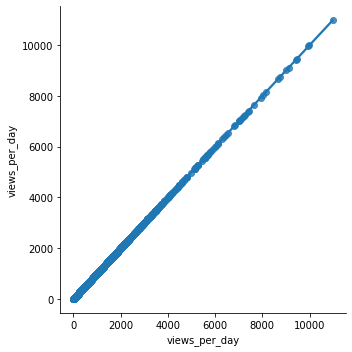

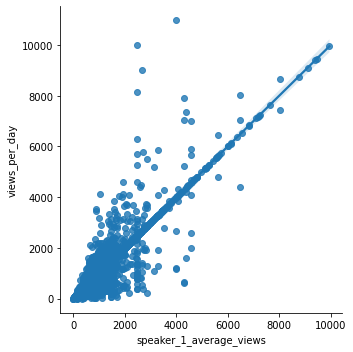

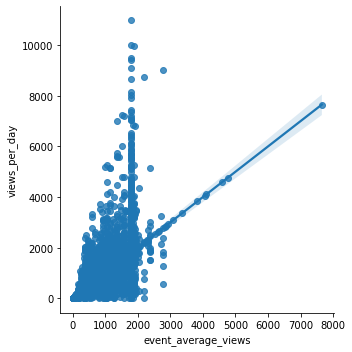

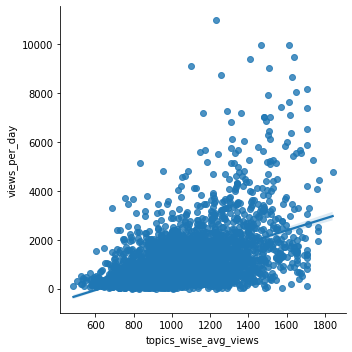

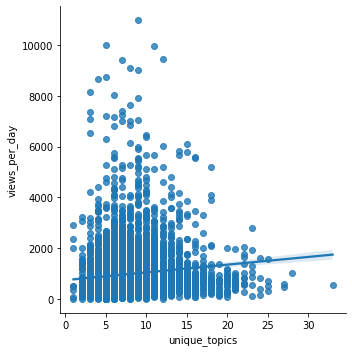

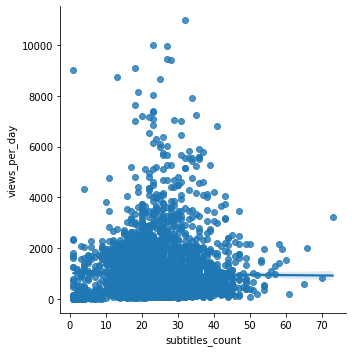

In [133]:
for column in df_without_categorical_variable:
  sns.lmplot(x=column, y="views_per_day", data=df_without_categorical_variable, order=1)
# plt.ylabel('Target')
# plt.xlabel('Independent variable')

##**2) Multi collinearity should be vavoided**

In [134]:
DF = X_without_categorical_variable.copy()

In [135]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [136]:
VIF_df = calc_vif(X[[i for i in DF.describe().columns ]])
VIF_df

variables        VIF
0                 comments   3.833973
1                 duration   7.056477
2                video_age  13.751606
3  speaker_1_average_views   3.211299
4      event_average_views   9.495875
5    topics_wise_avg_views  20.736655
6            unique_topics   5.437107
7          subtitles_count  15.659288

In [137]:
calc_vif(DF[[i for i in DF.describe().columns if i not in ['video_age','topics_wise_avg_views','subtitles_count'] ]])
#trying to eave which ever had >10

variables       VIF
0                 comments  2.450991
1                 duration  3.833741
2  speaker_1_average_views  2.948597
3      event_average_views  4.685677
4            unique_topics  4.630432

By VIF factor we have kept only few of the columns with less VIF score.

In [138]:
DF.columns

Index(['comments', 'duration', 'video_age', 'speaker_1_average_views',
       'event_average_views', 'topics_wise_avg_views', 'unique_topics',
       'subtitles_count'],
      dtype='object')

##**3)All independednt variabels should be normally distributed**
Here we checking from QQ plot




## ***Applying Transformation***

In [141]:
#As we have more number of varibales,trying to create a function which does the plotting and transformation.
#But be carefull as we have several variables with positively skewed data and 'not-normal' data.
#Whenever we have positively skewed data we need to use the log transformation. Or else we can use Boxcox transformation.

#import libraries
import scipy.stats as stats
import pylab

def to_plot(column):
  plt.figure(figsize=(10,6))
  plt.subplot(1,2,1)
  sns.distplot(DF[column])
  plt.subplot(1,2,2)
  stats.probplot(DF[column],dist='norm',plot=pylab)
  plt.show()


def log_transform(column):
  print("Before Transformation")
  to_plot(column)
  # applying log transformation
  DF[column]=np.log1p(DF[column])
  #plotting
  print("After Transformation")
  to_plot(column)
  # stats.probplot()

def box_cox_transform(column):
  print("Before Transformation")
  to_plot(column)
  # applying boxcox transformation
  DF[column],parameters=stats.boxcox(DF[column])
  print("After Transformation")
  to_plot(column)

def square_root_transform(column):
  print("Before Transformation")
  to_plot(column)
  DF[column]=DF[column]**(1/2)
  print("After Transformation")
  to_plot(column)

def exponential_transform(column):
  print("Before Transformation")
  to_plot(column)
  DF[column]=DF[column]**(1/1.2)
  print("After Transformation")
  to_plot(column)


def power_transform(column):
  print("Applying Power Transformation.\n Before Transformation")
  to_plot(column)
  # applying power transformation
  DF[column]=np.power(DF[column],1/2)
  #plotting
  print("After Transformation")
  to_plot(column)
  # stats.probplot()


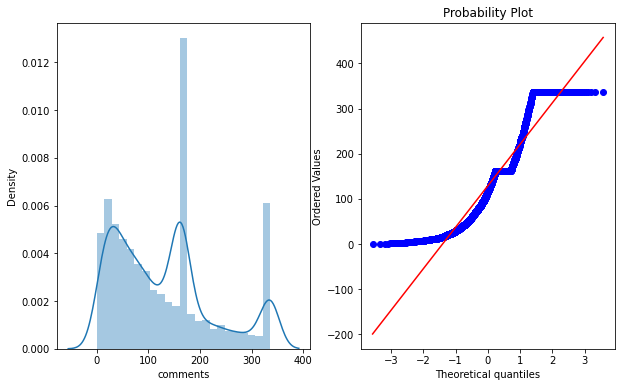

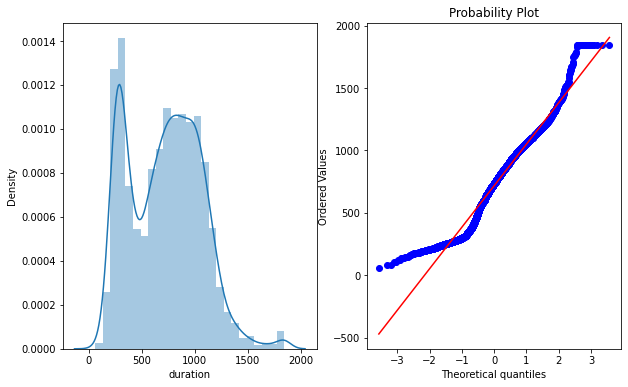

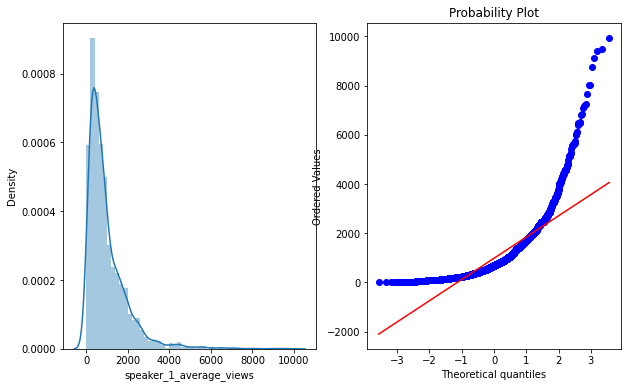

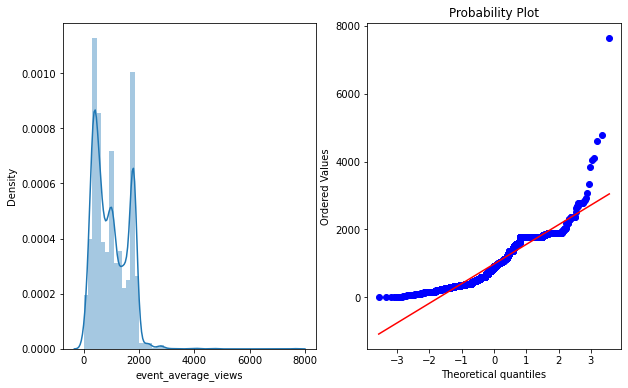

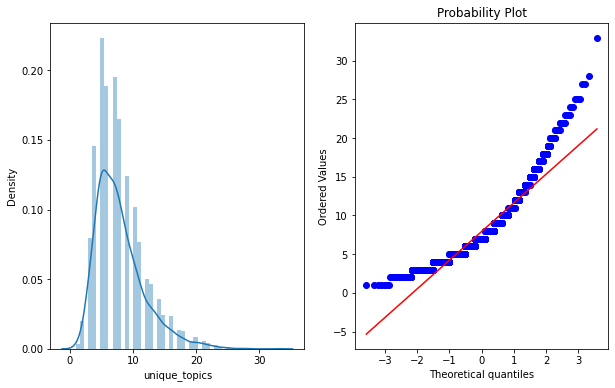

In [142]:
for column in DF:
  to_plot(column)

Before Transformation


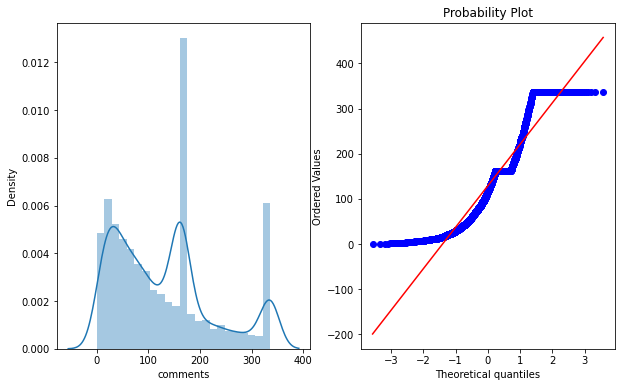

After Transformation


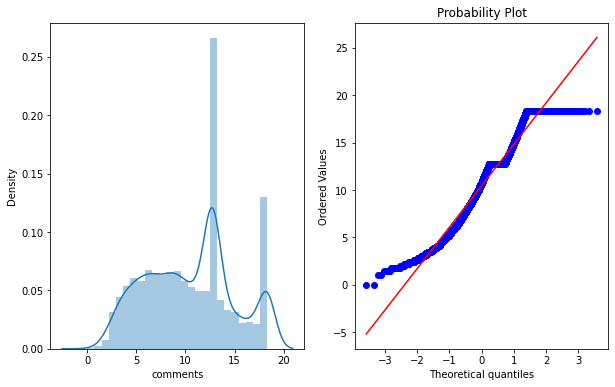

Before Transformation


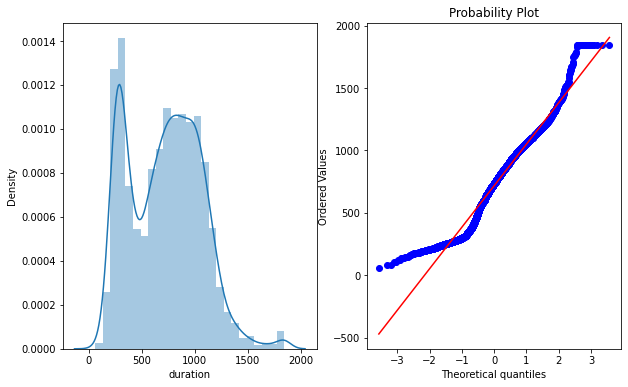

After Transformation


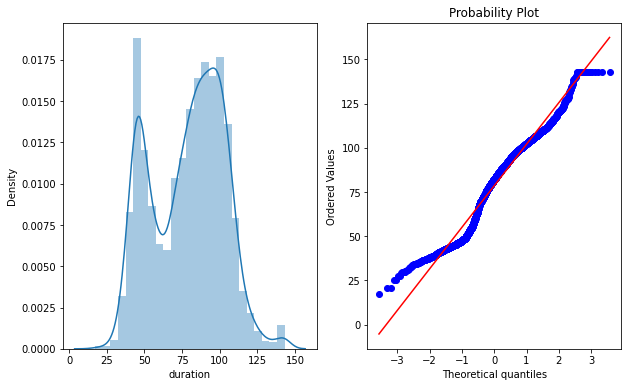

Before Transformation


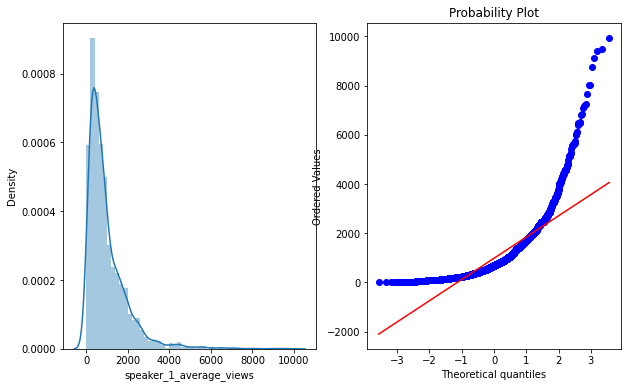

After Transformation


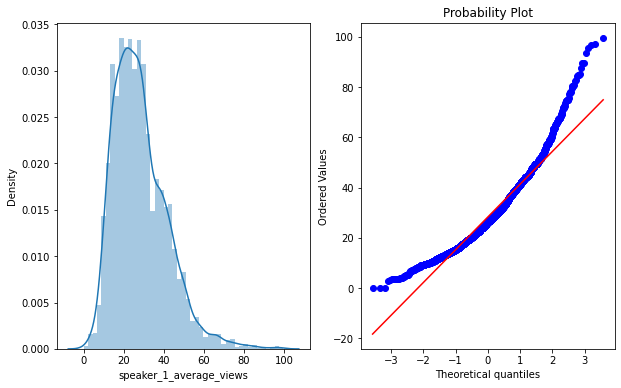

Before Transformation


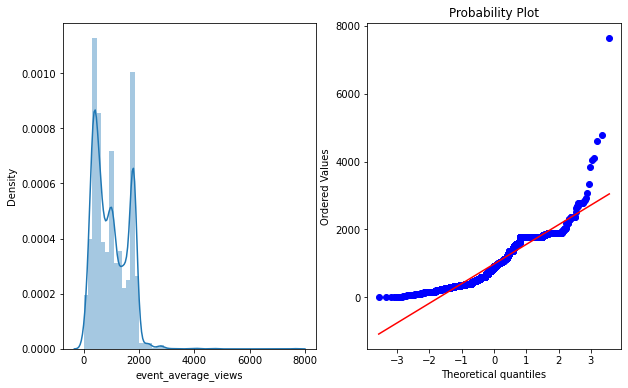

After Transformation


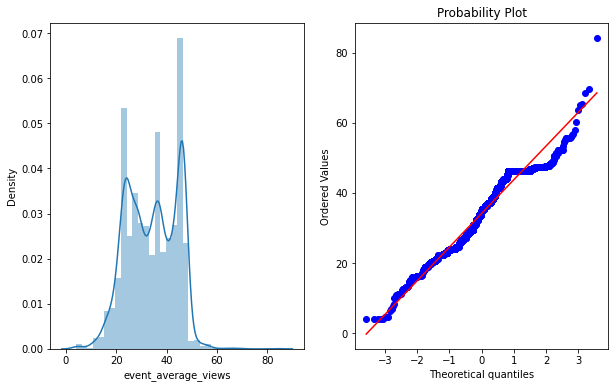

Before Transformation


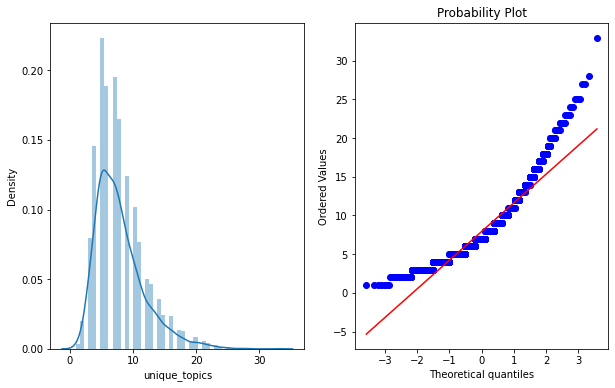

After Transformation


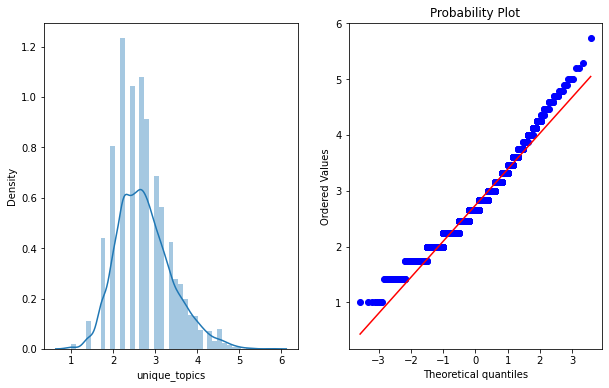

In [143]:

square_root_transform('comments')
box_cox_transform('duration')

square_root_transform('speaker_1_average_views')
box_cox_transform('event_average_views')

square_root_transform('unique_topics')



After applying the transformation and treating with VIF factor checking again for correlation.

In [144]:
DF.head()
#Which does not contain categorical and dependent variable


comments    duration  ...  event_average_views  unique_topics
0  16.492423   97.610498  ...            23.902735       3.000000
1  11.135529  115.142920  ...            23.902735       3.000000
2  14.798649  105.741599  ...            23.902735       3.000000
3   6.928203  110.344336  ...            23.902735       2.236068
4  18.330303   98.509736  ...            23.902735       3.000000

[5 rows x 5 columns]

In [146]:
corr = DF.corr()
corr.style.background_gradient(cmap='coolwarm')

In [147]:
DF.drop('event_average_views',axis=1,inplace=True)
#Strong correlation 


In [148]:
corr = DF.corr()
corr.style.background_gradient(cmap='coolwarm')

We saw that event wise average views a=were highly correlated wih speaker average views, so we tried dropping that out.

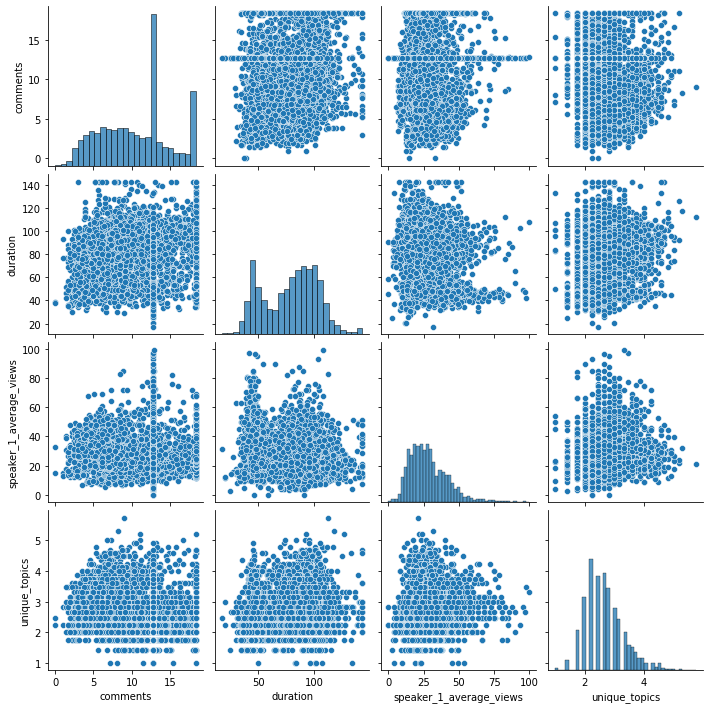

In [149]:
p = sns.pairplot(DF)

Just tring to visualize the DF after treating eith correlation and transformation.

##**One hot Encoding**

DF contains only the numeric columns, so we merge it with the categorical column. And we use One hot encoding to use the categorical columns in a better way.

In [158]:
DF.columns

Index(['comments', 'duration', 'speaker_1_average_views', 'unique_topics'], dtype='object')

In [159]:
features_df = DF.copy()

In [160]:
features_df['release_day'] = df['release_day']
features_df['release_month'] = df['release_month']
features_df['release_year'] = df['release_year']

In [161]:
features_df.head(2)

comments    duration  ...  release_month  release_year
0  16.492423   97.610498  ...           June          2006
1  11.135529  115.142920  ...           June          2006

[2 rows x 7 columns]

In [162]:
features_df = pd.get_dummies(features_df, columns=['release_day', 'release_month', 'release_year'])

In [163]:
features_df.head(2)

comments    duration  ...  release_year_2019  release_year_2020
0  16.492423   97.610498  ...                  0                  0
1  11.135529  115.142920  ...                  0                  0

[2 rows x 38 columns]

##**Min max scaler**

Now everythin is done except normalization, we need to have the dat in same standards to get optimized results for the models. So we use Min max scaler

In [166]:
#Min max scaler


column_names = list(features_df.columns)
# column_names

#taking columns to do the minmaxscaling
DF_scaled = pd.DataFrame()
#using standardization as both numeric columns are in different scale

scaler = MinMaxScaler()
scaled = scaler.fit_transform(features_df)
#print(scaled)
DF_scaled = pd.DataFrame(scaler.fit_transform(features_df))
DF_scaled.columns = column_names

In [167]:

DF_scaled.head()

comments  duration  ...  release_year_2019  release_year_2020
0  0.899735  0.638816  ...                0.0                0.0
1  0.607493  0.778386  ...                0.0                0.0
2  0.807332  0.703545  ...                0.0                0.0
3  0.377964  0.740186  ...                0.0                0.0
4  1.000000  0.645974  ...                0.0                0.0

[5 rows x 38 columns]

In [140]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3945 entries, 0 to 3944
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   comments                 3945 non-null   float64
 1   duration                 3945 non-null   float64
 2   speaker_1_average_views  3945 non-null   float64
 3   event_average_views      3945 non-null   float64
 4   unique_topics            3945 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 154.2 KB


In [139]:
DF = DF[['comments', 'duration','speaker_1_average_views',
       'event_average_views','unique_topics']]

# **Dependednt variable**

All the normalization and transformations were done only for the independent variables. Now we try doing the same for dependent variable as well to get better result for our model

In [168]:
df['views_per_day'].describe()

count     3945.000000
mean       984.086629
std       1095.753307
min          0.000000
25%        311.727457
50%        640.591368
75%       1290.844465
max      10979.149171
Name: views_per_day, dtype: float64

In [169]:
# Transforming dependent variable

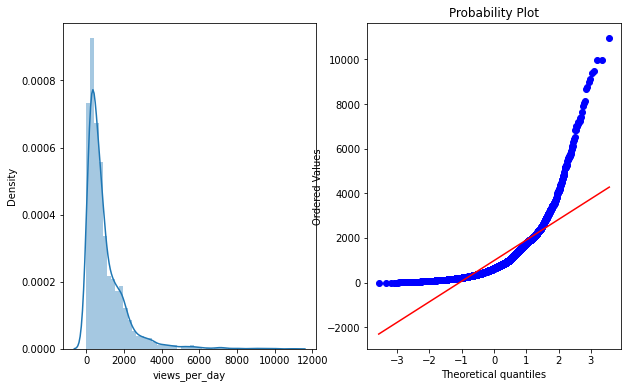

In [170]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.distplot(df['views_per_day'])
plt.subplot(1,2,2)
stats.probplot(df['views_per_day'],dist='norm',plot=pylab)
plt.show()

In [171]:

def plot_(col):
  plt.figure(figsize=(10,6))
  plt.subplot(1,2,1)
  sns.distplot(col)
  plt.subplot(1,2,2)
  stats.probplot(col,dist='norm',plot=pylab)
  plt.show()


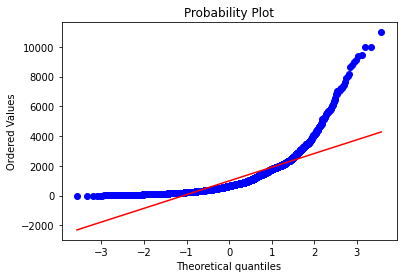

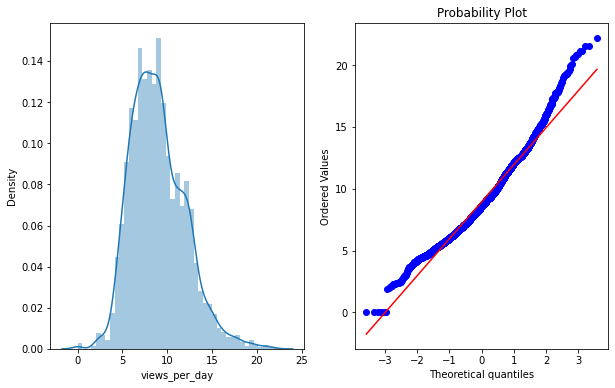

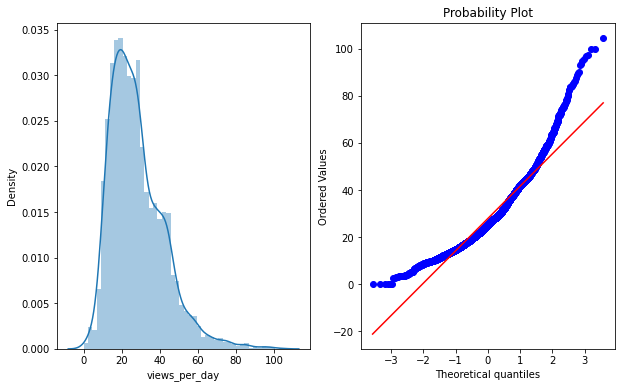

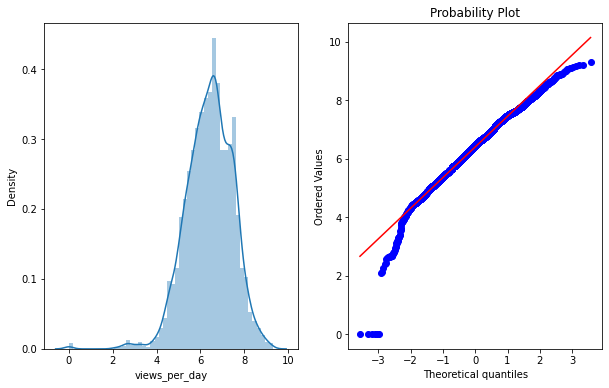

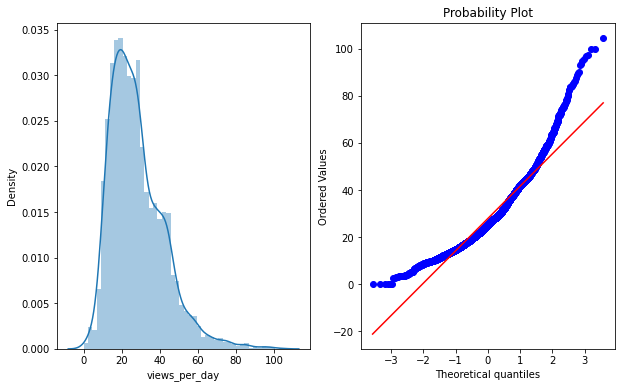

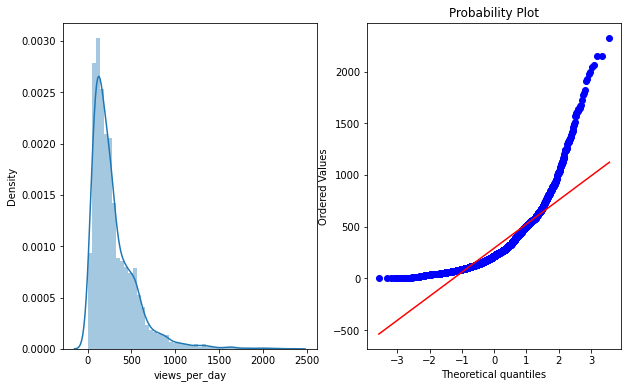

In [172]:
stats.probplot(df['views_per_day'],dist='norm',plot=pylab)
y1 = np.power(df['views_per_day'],1/3)
plot_(y1)
y2=np.power(df['views_per_day'],1/2)
plot_(y2)
y3=np.log1p(df['views_per_day'])
plot_(y3)
#y4=stats.boxcox(df['views_per_day'])
y5=df['views_per_day']**(1/2)
plot_(y5)
y6=df['views_per_day']**(1/1.2)
plot_(y6)




Now our our data is all set to build model. Before that lets just do the train and test split.

# **Train and test split**

We have already taken the dependent variable seperately, lets just equate it into y and X has ll the indeoendent variables.

In [173]:
df.head(2)
y = y1
X = DF_scaled

In [174]:
X_train, X_test, y_train, y_test= train_test_split(X, y,  test_size= 0.20, random_state= 5)



#**Model building**

In [175]:
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR
import time
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import ensemble


In [176]:
def Calculating_errors(y_train,y_pred_train,y_test,y_test_pred):
  MSE_test  = mean_squared_error(y_test, y_test_pred)
  print("MSE on test is" ,MSE_test)
  MSE_train  = mean_squared_error(y_train, y_pred_train)
  print("MSE on train is" ,MSE_train)
  RMSE_test = np.sqrt(MSE_test)
  print("RMSE on test is" ,RMSE_test)
  RMSE_train = np.sqrt(MSE_train)
  print("RMSE on test is" ,RMSE_train)
  print('Training MAE: {:0.2f}'.format(mean_absolute_error(y_train, y_pred_train)))
  print('Test MAE: {:0.2f}'.format(mean_absolute_error(y_test, y_test_pred)))


# **Linear regression**

In [177]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [178]:
print(f"The r2 score for testing is {round(r2_score(y_test,lin_reg.predict(X_test)),4)}")
print(f"The r2 score for training is {round(r2_score(y_train,lin_reg.predict(X_train)),4)}")

The r2 score for testing is 0.857
The r2 score for training is 0.8627


In [179]:
y_pred_train_reg =lin_reg.predict(X_train)
y_test_pred_reg = lin_reg.predict(X_test)


In [180]:
Calculating_errors(y_train,y_pred_train_reg,y_test,y_test_pred_reg)

MSE on test is 1.414052125027846
MSE on train is 1.2367362545214333
RMSE on test is 1.1891392370230855
RMSE on test is 1.11208644201853
Training MAE: 0.61
Test MAE: 0.64


# **Regularized linear regression**

In [181]:
!pip install catboost
!pip install lightgbm

     |████████████████████████████████| 76.1 MB 68 kB/s 


In [182]:
from sklearn.linear_model import LinearRegression,ElasticNet
from sklearn.model_selection import train_test_split,GridSearchCV
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor,VotingRegressor,StackingRegressor


In [183]:
elastic_param = {'alpha' : [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                 'l1_ratio' : [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
                }

In [184]:
elastic_grid = GridSearchCV(estimator=ElasticNet(),
                       param_grid = elastic_param,n_jobs=9,
                       cv = 5, verbose=2, scoring='r2')
elastic_grid.fit(X_train,y_train)

Fitting 5 folds for each of 77 candidates, totalling 385 fits


GridSearchCV(cv=5, estimator=ElasticNet(), n_jobs=9,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9, 1]},
             scoring='r2', verbose=2)

In [185]:
optimal_elastic = elastic_grid.best_estimator_

In [186]:
print(f"The r2 score for testing is {round(r2_score(y_test,optimal_elastic.predict(X_test)),4)}")
print(f"The r2 score for training is {round(r2_score(y_train,optimal_elastic.predict(X_train)),4)}")

The r2 score for testing is 0.8577
The r2 score for training is 0.8629


In [187]:
y_pred_train_ela = optimal_elastic.predict(X_train)
y_test_pred_ela = optimal_elastic.predict(X_test)

In [188]:
Calculating_errors(y_train,y_pred_train_ela,y_test,y_test_pred_ela)

MSE on test is 1.4067406972811567
MSE on train is 1.2346393448187392
RMSE on test is 1.186061000657705
RMSE on test is 1.1111432602588827
Training MAE: 0.61
Test MAE: 0.63


# **Random Forest**

In [189]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR

In [190]:
rf = RandomForestRegressor(criterion='mae')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [191]:
print(f"The r2 score for testing is {round(r2_score(y_test,rf.predict(X_test)),4)}")
print(f"The r2 score for training is {round(r2_score(y_train,rf.predict(X_train)),4)}")

The r2 score for testing is 0.8298
The r2 score for training is 0.9761


In [192]:
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

In [193]:
Calculating_errors(y_train,y_train_pred_rf,y_test,y_test_pred_rf)

MSE on test is 1.6833017120456135
MSE on train is 0.21493783425996113
RMSE on test is 1.2974211775848326
RMSE on test is 0.4636138848869403
Training MAE: 0.24
Test MAE: 0.63


# **Optimal Random forest**

In [194]:
rf_param = {
            'n_estimators':[100,250,500],
            'max_depth':[2,4,5,6],
            'max_leaf_nodes':[150]
           }

In [195]:
rf_grid = GridSearchCV(estimator=RandomForestRegressor(),
                       param_grid = rf_param,n_jobs=9,
                       cv = 5, verbose=2, scoring='r2')
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=9,
             param_grid={'max_depth': [2, 4, 5, 6], 'max_leaf_nodes': [150],
                         'n_estimators': [100, 250, 500]},
             scoring='r2', verbose=2)

In [196]:
optimal_rf = rf_grid.best_estimator_

In [197]:
print(f"The r2 score for testing is {round(r2_score(y_test,optimal_rf.predict(X_test)),4)}")
print(f"The r2 score for training is {round(r2_score(y_train,optimal_rf.predict(X_train)),4)}")

The r2 score for testing is 0.8533
The r2 score for training is 0.8779


In [198]:
y_train_pred_optimal_rf = optimal_rf.predict(X_train)
y_test_pred_optimal_rf = optimal_rf.predict(X_test)

In [199]:
Calculating_errors(y_train,y_train_pred_optimal_rf,y_test,y_test_pred_optimal_rf)

MSE on test is 1.4508487117334083
MSE on train is 1.09994193703713
RMSE on test is 1.2045118146923293
RMSE on test is 1.0487811673734087
Training MAE: 0.50
Test MAE: 0.56


# **CatBoost** **Regression**

In [200]:
cat_reg = CatBoostRegressor()
cat_reg.fit(X_train,y_train)

Learning rate set to 0.049096
0:	learn: 2.8903965	total: 53.3ms	remaining: 53.3s
1:	learn: 2.7866059	total: 59.8ms	remaining: 29.8s
2:	learn: 2.6862968	total: 65.2ms	remaining: 21.7s
3:	learn: 2.5920956	total: 71.8ms	remaining: 17.9s
4:	learn: 2.5064631	total: 76.2ms	remaining: 15.2s
5:	learn: 2.4194571	total: 81.7ms	remaining: 13.5s
6:	learn: 2.3383241	total: 87.1ms	remaining: 12.4s
7:	learn: 2.2658550	total: 92.6ms	remaining: 11.5s
8:	learn: 2.1947638	total: 98.2ms	remaining: 10.8s
9:	learn: 2.1277545	total: 104ms	remaining: 10.2s
10:	learn: 2.0701225	total: 109ms	remaining: 9.79s
11:	learn: 2.0108460	total: 114ms	remaining: 9.41s
12:	learn: 1.9538496	total: 128ms	remaining: 9.76s
13:	learn: 1.8984715	total: 131ms	remaining: 9.23s
14:	learn: 1.8456483	total: 136ms	remaining: 8.9s
15:	learn: 1.7960077	total: 141ms	remaining: 8.66s
16:	learn: 1.7587606	total: 146ms	remaining: 8.44s
17:	learn: 1.7157748	total: 151ms	remaining: 8.25s
18:	learn: 1.6774116	total: 156ms	remaining: 8.08s
19:

In [201]:
print(f"The r2 score for testing is {round(r2_score(y_test,cat_reg.predict(X_test)),4)}")
print(f"The r2 score for training is {round(r2_score(y_train,cat_reg.predict(X_train)),4)}")

The r2 score for testing is 0.872
The r2 score for training is 0.9577


In [202]:
y_train_pred_cat = cat_reg.predict(X_train)
y_test_pred_cat = cat_reg.predict(X_test)

In [203]:
Calculating_errors(y_train,y_train_pred_cat,y_test,y_test_pred_cat)

MSE on test is 1.265267908885412
MSE on train is 0.38082557397920264
RMSE on test is 1.124841281641731
RMSE on test is 0.6171106659094482
Training MAE: 0.37
Test MAE: 0.61


# **Optimal** **catboost** **regressor**

In [204]:
cat_param = {'depth': [2,4,5],
             'learning_rate' : [0.01,0.05,0.1],
             'iterations'    : [150,200]
            }

In [205]:
ct_grid = GridSearchCV(estimator=cat_reg,
                       param_grid = cat_param,n_jobs=9,
                       cv = 5, verbose=2, scoring='r2')

In [206]:
ct_grid.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
0:	learn: 2.7825779	total: 1.48ms	remaining: 295ms
1:	learn: 2.5797768	total: 2.71ms	remaining: 268ms
2:	learn: 2.4052592	total: 3.89ms	remaining: 255ms
3:	learn: 2.2619079	total: 5.13ms	remaining: 251ms
4:	learn: 2.1102881	total: 6.39ms	remaining: 249ms
5:	learn: 1.9793414	total: 7.53ms	remaining: 244ms
6:	learn: 1.8683268	total: 8.92ms	remaining: 246ms
7:	learn: 1.7677582	total: 10.3ms	remaining: 247ms
8:	learn: 1.6882478	total: 12.1ms	remaining: 256ms
9:	learn: 1.6104437	total: 13.8ms	remaining: 262ms
10:	learn: 1.5423028	total: 15.2ms	remaining: 260ms
11:	learn: 1.4878147	total: 16.6ms	remaining: 259ms
12:	learn: 1.4370034	total: 17.9ms	remaining: 258ms
13:	learn: 1.3972580	total: 19.3ms	remaining: 256ms
14:	learn: 1.3621492	total: 20.6ms	remaining: 254ms
15:	learn: 1.3304365	total: 22.2ms	remaining: 255ms
16:	learn: 1.3015611	total: 23.6ms	remaining: 254ms
17:	learn: 1.2790407	total: 24.9ms	remaining: 252ms
18:	learn: 1.

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x7fb280906bd0>,
             n_jobs=9,
             param_grid={'depth': [2, 4, 5], 'iterations': [150, 200],
                         'learning_rate': [0.01, 0.05, 0.1]},
             scoring='r2', verbose=2)

In [207]:
optimal_cat = ct_grid.best_estimator_

In [208]:
print(f"The r2 score for testing is {round(r2_score(y_test,optimal_cat.predict(X_test)),4)}")
print(f"The r2 score for training is {round(r2_score(y_train,optimal_cat.predict(X_train)),4)}")

The r2 score for testing is 0.8674
The r2 score for training is 0.911


In [209]:
y_train_pred_optcat = optimal_cat.predict(X_train)
y_test_pred_optcat = optimal_cat.predict(X_test)

In [210]:
Calculating_errors(y_train,y_train_pred_optcat,y_test,y_test_pred_optcat)

MSE on test is 1.3115563566259514
MSE on train is 0.8015110856434295
RMSE on test is 1.145232009955167
RMSE on test is 0.895271515040789
Training MAE: 0.49
Test MAE: 0.59


# **XG** **Boost** **Regression**

In [211]:
xgb_reg = XGBRegressor()

In [212]:
xgb_reg.fit(X_train,y_train)

[09:23:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [213]:
print(f"The r2 score for testing is {round(r2_score(y_test,xgb_reg.predict(X_test)),4)}")
print(f"The r2 score for training is {round(r2_score(y_train,xgb_reg.predict(X_train)),4)}")

The r2 score for testing is 0.8569
The r2 score for training is 0.8914


In [214]:
y_train_pred_xgb = xgb_reg.predict(X_train)
y_test_pred_xgb = xgb_reg.predict(X_test)

In [215]:
Calculating_errors(y_train,y_train_pred_xgb,y_test,y_test_pred_xgb)

MSE on test is 1.4153118658148416
MSE on train is 0.9785003683730072
RMSE on test is 1.1896688050944437
RMSE on test is 0.989191775326204
Training MAE: 0.50
Test MAE: 0.58


# **Optimaized XGboost**

In [216]:
xgb_param = {'n_estimators': [50,100,150,200],
            'max_depth': [2,4,5,10],
            'learning_rate':[0.01,0.05,0.1]
            }

In [217]:
xgb_grid = GridSearchCV(estimator=xgb_reg,
                       param_grid = xgb_param,n_jobs=9,
                       cv = 5, verbose=2, scoring='r2')

In [218]:
xgb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[09:25:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, estimator=XGBRegressor(), n_jobs=9,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [2, 4, 5, 10],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='r2', verbose=2)

In [219]:
optimal_xgb = xgb_grid.best_estimator_

In [220]:
print(f"The r2 score for testing is {round(r2_score(y_test,optimal_xgb.predict(X_test)),4)}")
print(f"The r2 score for training is {round(r2_score(y_train,optimal_xgb.predict(X_train)),4)}")

The r2 score for testing is 0.8616
The r2 score for training is 0.8841


In [221]:
y_train_pred_optxgb = optimal_xgb.predict(X_train)
y_test_pred_optxgb = optimal_xgb.predict(X_test)

In [222]:
Calculating_errors(y_train,y_train_pred_optxgb,y_test,y_test_pred_optxgb)

MSE on test is 1.3687726435601932
MSE on train is 1.0437243766455322
RMSE on test is 1.169945572905079
RMSE on test is 1.0216282967134045
Training MAE: 0.53
Test MAE: 0.59


# **Extra** **Tree** **Regression**

In [223]:
extra_tree_reg = ExtraTreesRegressor(criterion='mae', max_depth=30, n_estimators=200, min_samples_leaf=2, min_samples_split=6)
extra_tree_reg.fit(X_train, y_train)

ExtraTreesRegressor(criterion='mae', max_depth=30, min_samples_leaf=2,
                    min_samples_split=6, n_estimators=200)

In [224]:
print(f"The r2 score for testing is {round(r2_score(y_test,extra_tree_reg.predict(X_test)),4)}")
print(f"The r2 score for training is {round(r2_score(y_train,extra_tree_reg.predict(X_train)),4)}")

The r2 score for testing is 0.8572
The r2 score for training is 0.9442


In [225]:
y_train_pred_extra = extra_tree_reg.predict(X_train)
y_test_pred_extra = extra_tree_reg.predict(X_test)

In [226]:
Calculating_errors(y_train,y_train_pred_extra,y_test,y_test_pred_cat)

MSE on test is 1.265267908885412
MSE on train is 0.5024470544526065
RMSE on test is 1.124841281641731
RMSE on test is 0.7088349980444014
Training MAE: 0.30
Test MAE: 0.61


# **Optimal** **Extra** **Tree** **Regression**

In [227]:
#Extra Trees Regressor paramdict
# Number of trees
n_estimators = [50,80,100]
# Maximum depth of trees
max_depth = [4,6,8]
# Minimum number of samples required to split a node
min_samples_split = [50,100,150]
# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]
# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [228]:
# Create an instance of the Extratrees regressor
et_model = ExtraTreesRegressor(criterion='mae')

#RandomSearch
et_random = RandomizedSearchCV(et_model,param_dict,verbose=2,cv=5)
et_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=80; total time=  17.5s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=80; total time=  17.1s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=80; total time=  37.5s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=80; total time=  19.7s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=80; total time=  17.6s
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=150, n_estimators=100; total time=  30.5s
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=150, n_estimators=100; total time=  34.8s
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=150, n_estimators=100; total time=  27.5s
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=150, n_estimators=100; total time=  25.5s
[CV] END max_depth=6, 

RandomizedSearchCV(cv=5, estimator=ExtraTreesRegressor(criterion='mae'),
                   param_distributions={'max_depth': [4, 6, 8],
                                        'min_samples_leaf': [40, 50],
                                        'min_samples_split': [50, 100, 150],
                                        'n_estimators': [50, 80, 100]},
                   verbose=2)

In [229]:
et_optimal_model = et_random.best_estimator_

In [230]:
y_train_pred_etopt = et_optimal_model.predict(X_train)
y_test_pred_etopt = et_optimal_model.predict(X_test)

In [231]:
Calculating_errors(y_train,y_train_pred_etopt,y_test,y_test_pred_etopt)

MSE on test is 1.8447759017802603
MSE on train is 1.6084697800288135
RMSE on test is 1.3582252765208944
RMSE on test is 1.2682546195574504
Training MAE: 0.73
Test MAE: 0.76


In [232]:
# make predictions for test data
y_hat = et_optimal_model.predict(X_test)
print(f'r_sqr value for train: {et_optimal_model.score(X_train, y_train)}')
r_squared= r2_score(y_test,y_hat)
#Calculate Adjusted R-sqaured
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(f'For test the R_Squared for ExtraTreesRegressor is {r_squared} and adjusted R_Squared is {adjusted_r_squared}')

r_sqr value for train: 0.82144241332611
For test the R_Squared for ExtraTreesRegressor is 0.813424893716341 and adjusted R_Squared is 0.8116097749148102


# **LGBM**

In [233]:
lgbm_reg = LGBMRegressor()
lgbm_reg.fit(X_train,y_train)

LGBMRegressor()

In [234]:
r2_score(y_train,lgbm_reg.predict(X_train))

0.9404996272901088

In [235]:
r2_score(y_test,lgbm_reg.predict(X_test))

0.8614689986589685

In [236]:
y_train_pred_lgbm = lgbm_reg.predict(X_train)
y_test_pred_lgbm = lgbm_reg.predict(X_test)

In [237]:
Calculating_errors(y_train,y_train_pred_lgbm,y_test,y_test_pred_lgbm)

MSE on test is 1.369736070442784
MSE on train is 0.5359870346987929
RMSE on test is 1.1703572405222193
RMSE on test is 0.7321113540294215
Training MAE: 0.42
Test MAE: 0.63


# **Optimal LGBM**

In [238]:
lgbm_param = {
              "n_estimators" :[50,100,150],
              'num_leaves': [6,8,12,16],
              "max_depth": [2,4,5],
              "learning_rate": [0.01,0.05,0.1]
              }

In [239]:
lgbm_grid = GridSearchCV(estimator=lgbm_reg,
                       param_grid = lgbm_param,n_jobs=6,
                       cv = 5, verbose=2, scoring='r2')

In [240]:
lgbm_grid.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=6,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [2, 4, 5], 'n_estimators': [50, 100, 150],
                         'num_leaves': [6, 8, 12, 16]},
             scoring='r2', verbose=2)

In [241]:
lgbm_optimal = lgbm_grid.best_estimator_

In [242]:
r2_score(y_test,lgbm_optimal.predict(X_test))

0.862854823978575

In [243]:
r2_score(y_train,lgbm_optimal.predict(X_train))

0.8988630912365121

In [244]:
y_train_pred_lgbm_optimal = lgbm_optimal.predict(X_train)
y_test_pred_lgbm_optimal = lgbm_optimal.predict(X_test)

In [245]:
Calculating_errors(y_train,y_train_pred_lgbm_optimal,y_test,y_test_pred_lgbm_optimal)

MSE on test is 1.3560336146081864
MSE on train is 0.911054323828343
RMSE on test is 1.16448856353688
RMSE on test is 0.9544916572858785
Training MAE: 0.51
Test MAE: 0.60


# **Comparing all models with model performance**

In [246]:
regressors = [optimal_elastic,optimal_rf,lgbm_optimal,optimal_cat,optimal_xgb,et_optimal_model]
reg_names = ['Regularized Linear regression','RandomForest','LGBM','CatBoost','XGBoost','Extra tree regressor']
training,testing = [],[]
for i in regressors:
    tr = round(r2_score(y_train,i.predict(X_train)),3)
    ts = round(r2_score(y_test,i.predict(X_test)),3)
    training.append(tr)
    testing.append(ts)

In [247]:
diff = np.array(training)-np.array(testing)


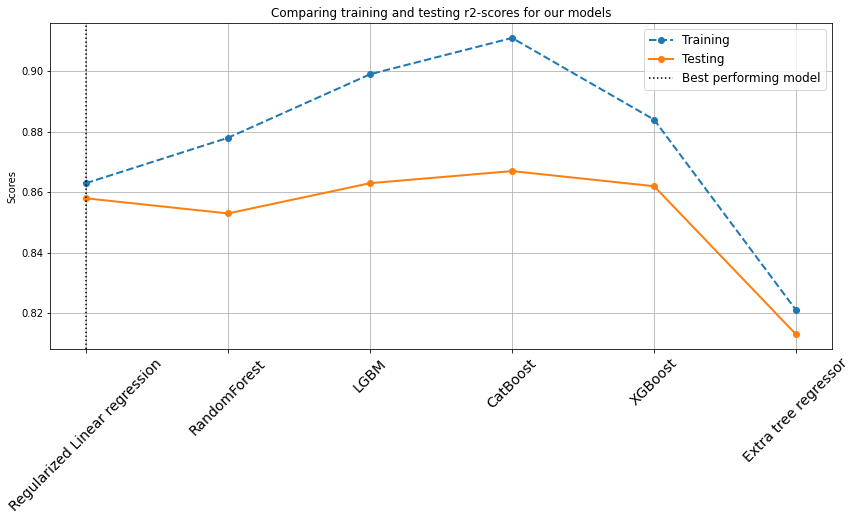

In [248]:
plt.figure(figsize=(14,6))
plt.plot(range(0,len(regressors)),training,'--o',lw=2,label='Training')
plt.plot(range(0,len(regressors)),testing,'-o',lw=2,label='Testing')
plt.xticks(range(0,len(regressors)), reg_names, rotation=45,fontsize=14)
plt.axvline(np.argmin(diff),linestyle=':', color='black', label=f'Best performing model')
plt.ylabel("Scores")
plt.title("Comparing training and testing r2-scores for our models")
plt.grid(True)
plt.legend(loc='best',fontsize=12);

We can observe that our modt models are overfitting, they performed alot better in traing but their performance is poor in testing. But comparitvely Regularized linear regression is performing well in traing and testing.

##**Evaluation metric for all models (in comaprision)**

In [249]:
#Defining all the models
models = [
           ['Regularized Linear Regression', elastic_grid.best_estimator_],
           ['Optimal Random Forest ', rf_grid.best_estimator_],
           ['LGBM ', lgbm_grid.best_estimator_],
           ['Catboost ',  ct_grid.best_estimator_],
           ['XGBoost ',xgb_grid.best_estimator_],    
           ['Extra tree regressor ', et_random.best_estimator_]          
        ]

In [250]:
#Let's run all the models and store the scores
model_1_data = []
for name,model in models :
    model_data = {}
    model.random_state = 42
    model_data["Name"] = name
    model.fit(X_train,y_train)
    model_data["MAE_train"] = metrics.mean_absolute_error(y_train, model.predict(X_train))
    model_data["MAE_test"] = metrics.mean_absolute_error(y_test, model.predict(X_test))
    model_data["MSE_train"] = metrics.mean_squared_error(y_train, model.predict(X_train))
    model_data["MSE_test"] = metrics.mean_squared_error(y_test, model.predict(X_test))
    model_data["R2_Score_train"] = r2_score(y_train,model.predict(X_train))
    model_data["R2_Score_test"] = r2_score(y_test,model.predict(X_test))   
    model_data['Adjusted_R2_score_train'] = 1 - (1-(r2_score(y_train,model.predict(X_train))))*(len(y)-1)/(len(y)-X.shape[1]-1)
    model_data['Adjusted_R2_score_test'] = 1 - (1-(r2_score(y_test,model.predict(X_test))))*(len(y)-1)/(len(y)-X.shape[1]-1)
    model_data["RMSE_Score_train"] = np.sqrt(mean_squared_error(y_train,model.predict(X_train)))
    model_data["RMSE_Score_test"] = np.sqrt(mean_squared_error(y_test,model.predict(X_test)))
    model_1_data.append(model_data)

0:	learn: 2.7825779	total: 2.58ms	remaining: 514ms
1:	learn: 2.5797768	total: 4.78ms	remaining: 473ms
2:	learn: 2.4052592	total: 6.36ms	remaining: 418ms
3:	learn: 2.2619079	total: 7.9ms	remaining: 387ms
4:	learn: 2.1102881	total: 9.48ms	remaining: 370ms
5:	learn: 1.9793414	total: 10.9ms	remaining: 353ms
6:	learn: 1.8683268	total: 12.4ms	remaining: 342ms
7:	learn: 1.7677582	total: 13.9ms	remaining: 333ms
8:	learn: 1.6882478	total: 15.3ms	remaining: 325ms
9:	learn: 1.6104437	total: 16.7ms	remaining: 318ms
10:	learn: 1.5423028	total: 18.2ms	remaining: 312ms
11:	learn: 1.4878147	total: 19.6ms	remaining: 307ms
12:	learn: 1.4370034	total: 21ms	remaining: 302ms
13:	learn: 1.3972580	total: 22.4ms	remaining: 297ms
14:	learn: 1.3621492	total: 23.7ms	remaining: 293ms
15:	learn: 1.3304365	total: 25.2ms	remaining: 289ms
16:	learn: 1.3015611	total: 26.6ms	remaining: 286ms
17:	learn: 1.2790407	total: 27.9ms	remaining: 283ms
18:	learn: 1.2563417	total: 29.3ms	remaining: 279ms
19:	learn: 1.2366449	tota

In [251]:
results = pd.DataFrame(model_1_data)
results

Name  MAE_train  ...  RMSE_Score_train  RMSE_Score_test
0  Regularized Linear Regression   0.613465  ...          1.111143         1.186061
1         Optimal Random Forest    0.504209  ...          1.047770         1.211395
2                          LGBM    0.512295  ...          0.954492         1.164489
3                      Catboost    0.486519  ...          0.895272         1.145232
4                       XGBoost    0.528415  ...          1.021628         1.169946
5          Extra tree regressor    0.763041  ...          1.288992         1.395234

[6 rows x 11 columns]

# After comparing all the models we can conclude that **Regularized linear regression** is the best performer. 